## Разработка программного модуля прогнозирования мощности ГРЭС с применением методов машинного обучения

### Первичный осмотр данных ГРЭС

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./PrimarySamplingGRES.csv')

In [3]:
data.head(15)

Date  BoilerTempColdAirLeft1  BoilerTempColdAirLeft2  \
0   2006-12-01 11:00:00.000                     NaN                     NaN   
1   2006-12-01 12:00:00.000                     NaN                     NaN   
2   2006-12-02 00:00:00.000                     NaN                     NaN   
3   2006-12-07 16:00:00.000                     NaN                     NaN   
4   2006-12-07 17:00:00.000                     NaN                     NaN   
5   2006-12-08 09:00:00.000                     NaN                     NaN   
6   2006-12-08 15:00:00.000                     NaN                     NaN   
7   2006-12-08 16:00:00.000                     NaN                     NaN   
8   2006-12-09 10:00:00.000                     NaN                     NaN   
9   2006-12-09 11:00:00.000                     NaN                     NaN   
10  2006-12-10 11:00:00.000                     NaN                     NaN   
11  2006-12-10 12:00:00.000                     NaN                     NaN   
12  2006-12-10 13:00:00.000                     NaN                     NaN   
13  2006-12-10 14:00:00.000                     NaN                     NaN   
14  2006-12-10 15:00:00.000                     NaN                     NaN   

    BoilerTempColdAirLeft3  BoilerTempColdAirLeft4  BoilerTempColdAirLeft5  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   
5                      NaN                     NaN                     NaN   
6                      NaN                     NaN                     NaN   
7                      NaN                     NaN                     NaN   
8                      NaN                     NaN                     NaN   
9                      NaN                     NaN                     NaN   
10                     NaN                     NaN                     NaN   
11                     NaN                     NaN                     NaN   
12                     NaN                     NaN                     NaN   
13                     NaN                     NaN                     NaN   
14                     NaN                     NaN                     NaN   

    BoilerTempColdAirLeft6  BoilerTempColdAirLeft7  BoilerTempColdAirLeft8  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   
5                      NaN                     NaN                     NaN   
6                      NaN                     NaN                     NaN   
7                      NaN                     NaN                     NaN   
8                      NaN                     NaN                     NaN   
9                      NaN                     NaN                     NaN   
10                     NaN                     NaN                     NaN   
11                     NaN                     NaN                     NaN   
12                     NaN                     NaN                     NaN   
13                     NaN                     NaN                     NaN   
14                     NaN                     NaN                     NaN   

    BoilerTempColdAirLeft9  ...  TurbineTempFeedSteam1  TurbineTempFeedSteam2  \
0                      NaN  ...                    NaN                    NaN   
1                      NaN  ...                    NaN                    NaN   
2                

In [53]:
# Смотрим пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78488 entries, 0 to 78487
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  78488 non-null  object 
 1   BoilerTempColdAirLeft1                3182 non-null   float64
 2   BoilerTempColdAirLeft2                3163 non-null   float64
 3   BoilerTempColdAirLeft3                3177 non-null   float64
 4   BoilerTempColdAirLeft4                2983 non-null   float64
 5   BoilerTempColdAirLeft5                3152 non-null   float64
 6   BoilerTempColdAirLeft6                3188 non-null   float64
 7   BoilerTempColdAirLeft7                3195 non-null   float64
 8   BoilerTempColdAirLeft8                3138 non-null   float64
 9   BoilerTempColdAirLeft9                3185 non-null   float64
 10  BoilerTempColdAirLeft10               3125 non-null   float64
 11  BoilerTempColdA

In [54]:
data.shape

(78488, 50)

### Предобработка данных

#### Унификация временных рядов

In [55]:
# Преобразуем столбец с датами в datetime, если еще не сделано
data['Date'] = pd.to_datetime(data['Date'])

# Создаем полный диапазон дат
min_date = data['Date'].min()
max_date = data['Date'].max()
full_dates = pd.date_range(min_date, max_date, freq='h')  # 'H' для часового интервала

# Создаем полный DataFrame и соединяем с данными
full_data = data.set_index('Date').reindex(full_dates)

# Восстанавливаем имя индекса
full_data.index.name = 'Date'
full_data

BoilerTempColdAirLeft1  BoilerTempColdAirLeft2  \
Date                                                                  
2006-12-01 11:00:00                     NaN                     NaN   
2006-12-01 12:00:00                     NaN                     NaN   
2006-12-01 13:00:00                     NaN                     NaN   
2006-12-01 14:00:00                     NaN                     NaN   
2006-12-01 15:00:00                     NaN                     NaN   
...                                     ...                     ...   
2016-01-20 05:00:00                     NaN                     NaN   
2016-01-20 06:00:00                     NaN                     NaN   
2016-01-20 07:00:00                     NaN                     NaN   
2016-01-20 08:00:00                     NaN                     NaN   
2016-01-20 09:00:00                     NaN                     NaN   

                     BoilerTempColdAirLeft3  BoilerTempColdAirLeft4  \
Date                                                                  
2006-12-01 11:00:00                     NaN                     NaN   
2006-12-01 12:00:00                     NaN                     NaN   
2006-12-01 13:00:00                     NaN                     NaN   
2006-12-01 14:00:00                     NaN                     NaN   
2006-12-01 15:00:00                     NaN                     NaN   
...                                     ...                     ...   
2016-01-20 05:00:00                     NaN                     NaN   
2016-01-20 06:00:00                     NaN                     NaN   
2016-01-20 07:00:00                     NaN                     NaN   
2016-01-20 08:00:00                     NaN                     NaN   
2016-01-20 09:00:00                     NaN                     NaN   

                     BoilerTempColdAirLeft5  BoilerTempColdAirLeft6  \
Date                                                                  
2006-12-01 11:00:00                     NaN                     NaN   
2006-12-01 12:00:00                     NaN                     NaN   
2006-12-01 13:00:00                     NaN                     NaN   
2006-12-01 14:00:00                     NaN                     NaN   
2006-12-01 15:00:00                     NaN                     NaN   
...                                     ...                     ...   
2016-01-20 05:00:00                     NaN                     NaN   
2016-01-20 06:00:00                     NaN                     NaN   
2016-01-20 07:00:00                     NaN                     NaN   
2016-01-20 08:00:00                     NaN                     NaN   
2016-01-20 09:00:00                     NaN                     NaN   

                     BoilerTempColdAirLeft7  BoilerTempColdAirLeft8  \
Date                                                                  
2006-12-01 11:00:00                     NaN                     NaN   
2006-12-01 12:00:00                     NaN                     NaN   
2006-12-01 13:00:00                     NaN                     NaN   
2006-12-01 14:00:00                     NaN                     NaN   
2006-12-01 15:00:00                     NaN                     NaN   
...                                     ...                     ...   
2016-01-20 05:00:00                     NaN                     NaN   
2016-01-20 06:00:00                     NaN                     NaN   
2016-01-20 07:00:00                     NaN                     NaN   
2016-01-20 08:00:00                     NaN                     NaN   
2016-01-20 09:00:00                     NaN                     NaN   

                     BoilerTempColdAirLeft9  BoilerTempColdAirLeft10  ...  \
Date                                                                  ...   
2006-12-01 11:00:00                     NaN                      NaN  ...   
2006-12-01 12:00:00                     NaN                      NaN  ...   
2006-12-01 13:00:

In [56]:
full_data.shape

(80087, 49)

In [57]:
full_data.isnull().sum()

BoilerTempColdAirLeft1                  76905
BoilerTempColdAirLeft2                  76924
BoilerTempColdAirLeft3                  76910
BoilerTempColdAirLeft4                  77104
BoilerTempColdAirLeft5                  76935
BoilerTempColdAirLeft6                  76899
BoilerTempColdAirLeft7                  76892
BoilerTempColdAirLeft8                  76949
BoilerTempColdAirLeft9                  76902
BoilerTempColdAirLeft10                 76962
BoilerTempColdAirLeft11                 76913
BoilerTempColdAirRight1                 76905
BoilerTempColdAirRight2                 76924
BoilerTempColdAirRight3                 76910
BoilerTempColdAirRight4                 77104
BoilerTempColdAirRight5                 76935
BoilerTempColdAirRight6                 76899
BoilerTempColdAirRight7                 76892
BoilerTempColdAirRight8                 76949
BoilerTempColdAirRight9                 76902
BoilerTempColdAirRight10                76962
BoilerTempColdAirRight11          

#### Исследование пропусков

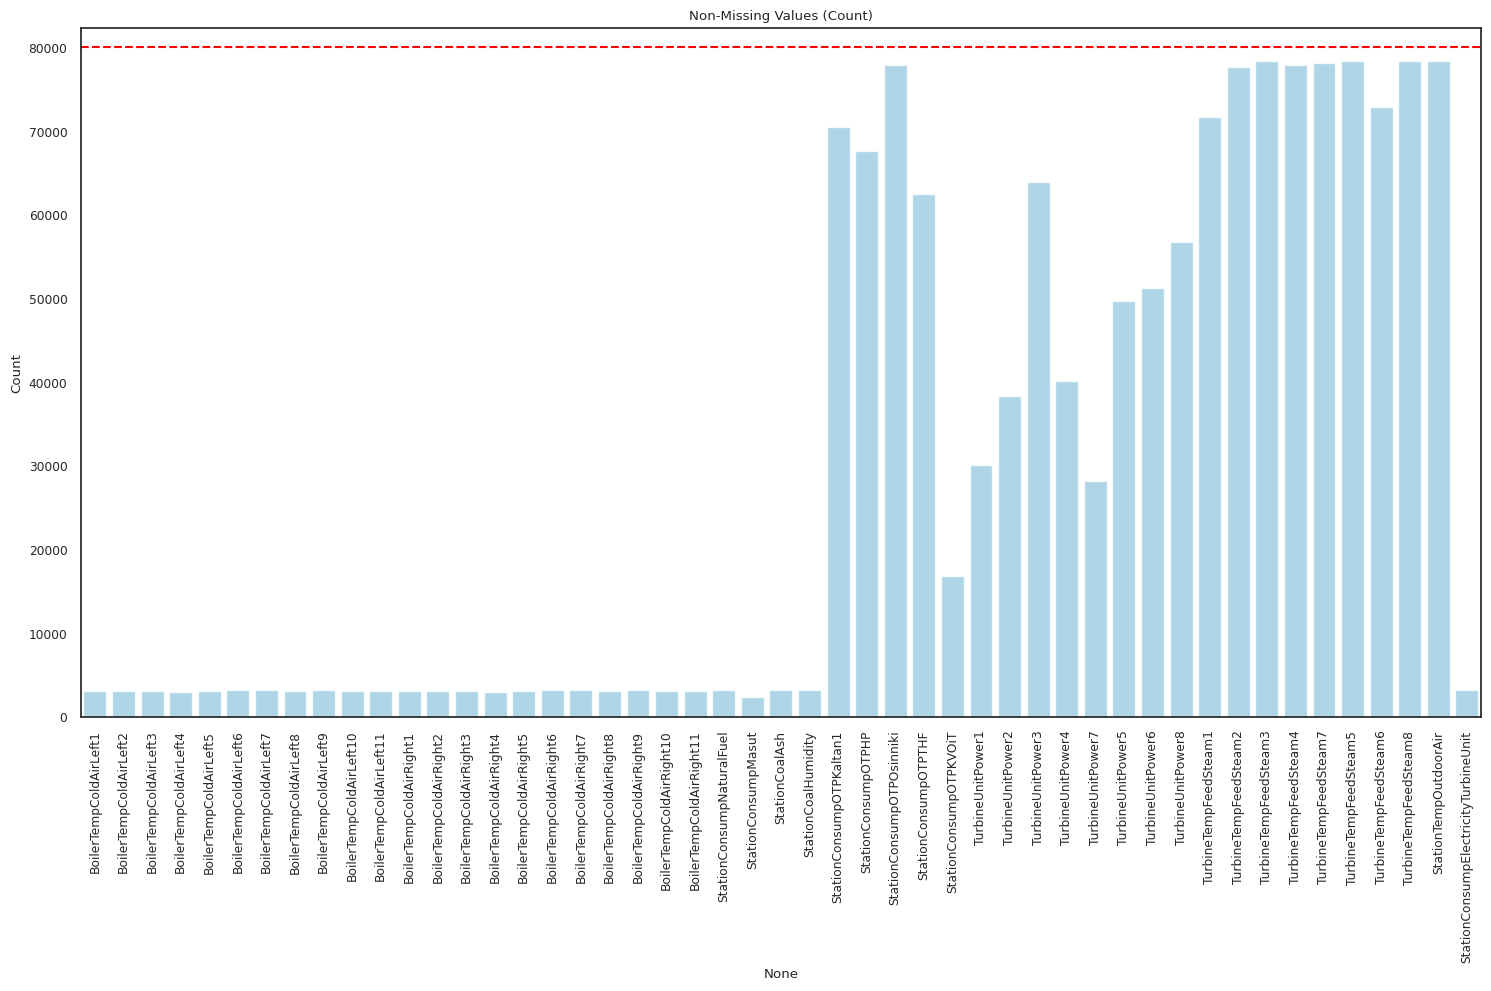

In [58]:
data_shape = len(full_data)  # Просто берём количество строк

plt.figure(figsize=(15, 10))
ax = sns.barplot(
    x=full_data.columns,
    y=data_shape - full_data.isnull().sum(),  # Количество НЕпропущенных значений
    color='skyblue',
    alpha=0.75
)
ax.axhline(data_shape, color='red', linestyle='--', linewidth=1.5, label='Total Rows')

ax.set_title("Non-Missing Values (Count)")  # Лучше отражает суть графика
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Исходя из диаграммы, можем предположить, что наблюдения признаков температуры холодного воздуха в котлах, температуры воздуха вне станции, зольности угля, влажности угля, расхода натурального топлива, мазута и э/э на турбины записываются с определенным интервалом времени

In [10]:
variable = 'StationCoalAsh'
(
    full_data
    .assign(
        na_var = lambda x: x[variable].isna(),
        weekday = lambda x: x.index.weekday
    )
    .groupby('weekday')
    .agg(
        {
            'na_var': ['sum', 'count', 'mean']
        }
    )
)

na_var                 
           sum  count      mean
weekday                        
0        10987  11448  0.959731
1        10989  11448  0.959906
2        10975  11434  0.959857
3        10964  11424  0.959734
4        10976  11437  0.959692
5        10987  11448  0.959731
6        10987  11448  0.959731

In [11]:
(
    full_data
    .assign(
        na_var = lambda x: x[variable].isna(),
        month = lambda x: x.index.month
    )
    .groupby('month')
    .agg(
        {
            'na_var': ('sum', 'count','mean')
        }
    )
)

na_var                
         sum count      mean
month                       
1       6896  7162  0.962860
2       5856  6096  0.960630
3       6417  6696  0.958333
4       6210  6480  0.958333
5       6417  6696  0.958333
6       6210  6480  0.958333
7       6417  6696  0.958333
8       6417  6696  0.958333
9       6210  6480  0.958333
10      6427  6696  0.959827
11      6239  6480  0.962809
12      7149  7429  0.962310

In [12]:
(
    full_data
    .assign(
        na_var = lambda x: x[variable].isna(),
        hour = lambda x: x.index.hour
    )
    .groupby('hour')
    .agg(
        {
            'na_var': ('sum', 'count','mean')
        }
    )
)

na_var                
        sum count      mean
hour                       
0       115  3337  0.034462
1      3337  3337  1.000000
2      3337  3337  1.000000
3      3337  3337  1.000000
4      3337  3337  1.000000
5      3337  3337  1.000000
6      3337  3337  1.000000
7      3337  3337  1.000000
8      3337  3337  1.000000
9      3337  3337  1.000000
10     3336  3336  1.000000
11     3337  3337  1.000000
12     3337  3337  1.000000
13     3337  3337  1.000000
14     3337  3337  1.000000
15     3337  3337  1.000000
16     3337  3337  1.000000
17     3337  3337  1.000000
18     3337  3337  1.000000
19     3337  3337  1.000000
20     3337  3337  1.000000
21     3337  3337  1.000000
22     3337  3337  1.000000
23     3337  3337  1.000000

**Вывод: Для вышеупомянутых признаков запись наблюдений производиться каждый день в 00:00:00.**

#### Исследование признаков температуры холодного воздуха для котлов

Первым делом посмотрим на различие между температурами слева и справа для каждого котла

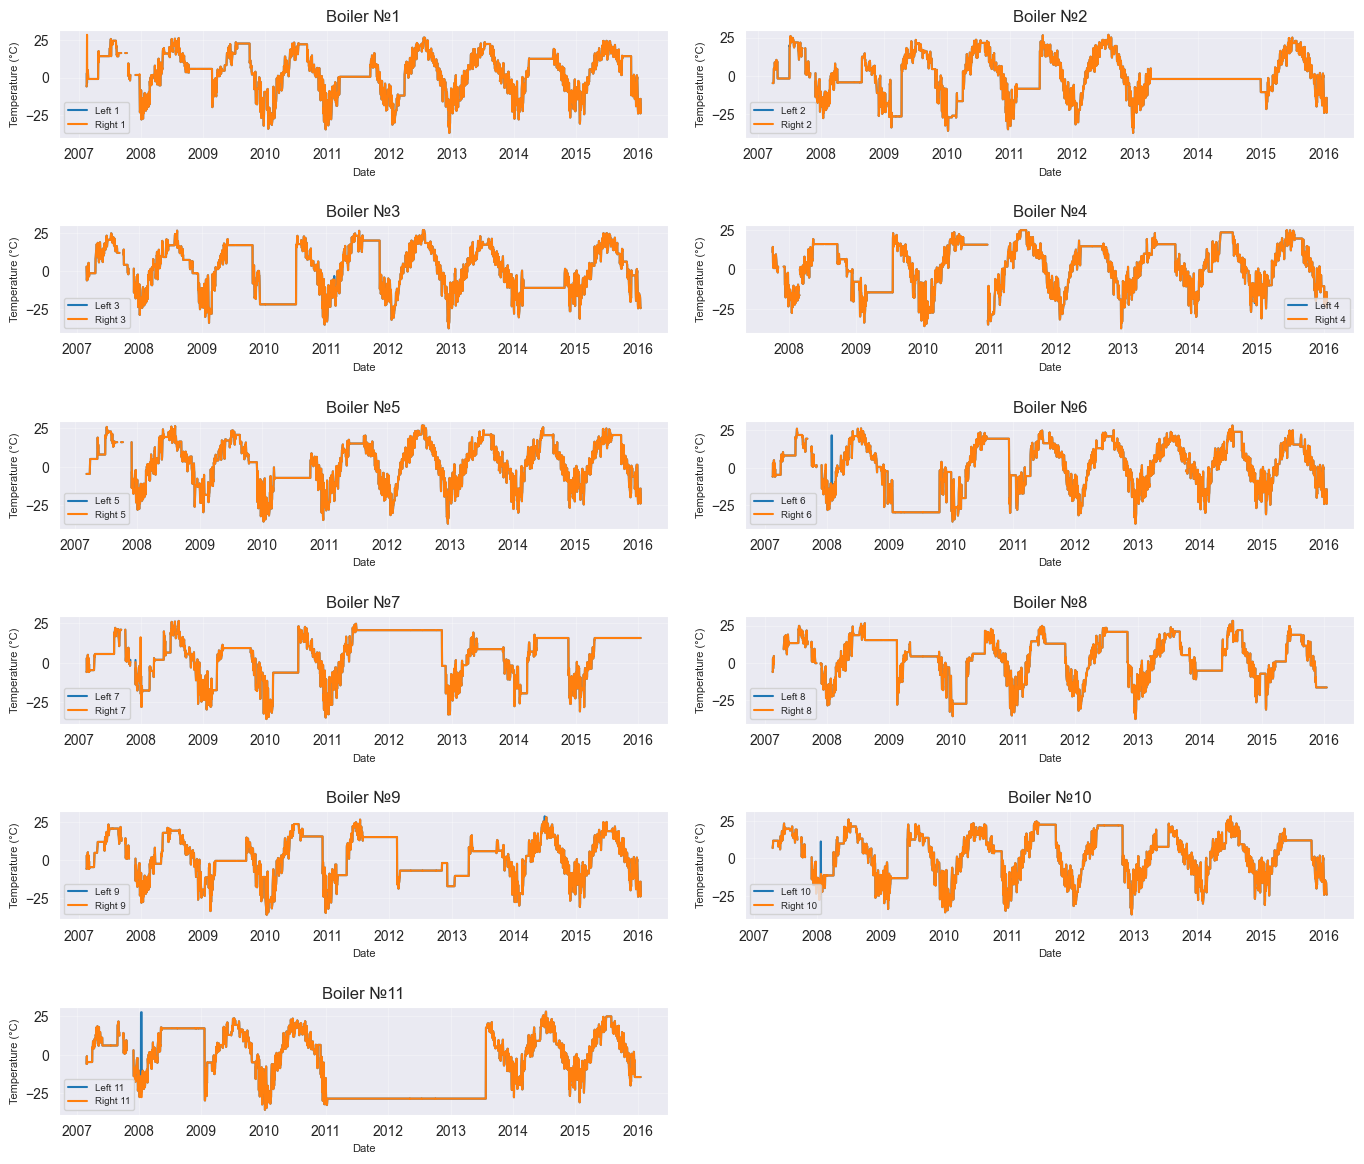

In [13]:
fig, axes = plt.subplots(6, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5)
daily = full_data.resample('D').mean()

for i, ax in enumerate(axes.flat, start=1):
    if i > 11:
        ax.axis('off')
        continue

    ax.plot(daily[f"BoilerTempColdAirLeft{i}"], label=f"Left {i}")
    ax.plot(daily[f"BoilerTempColdAirRight{i}"], label=f"Right {i}")

    ax.set_ylabel('Temperature (°C)', fontsize=8)
    ax.set_xlabel('Date', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=7)
    ax.set_title(f"Boiler №{i}")

plt.tight_layout(pad=2.0)
plt.show()

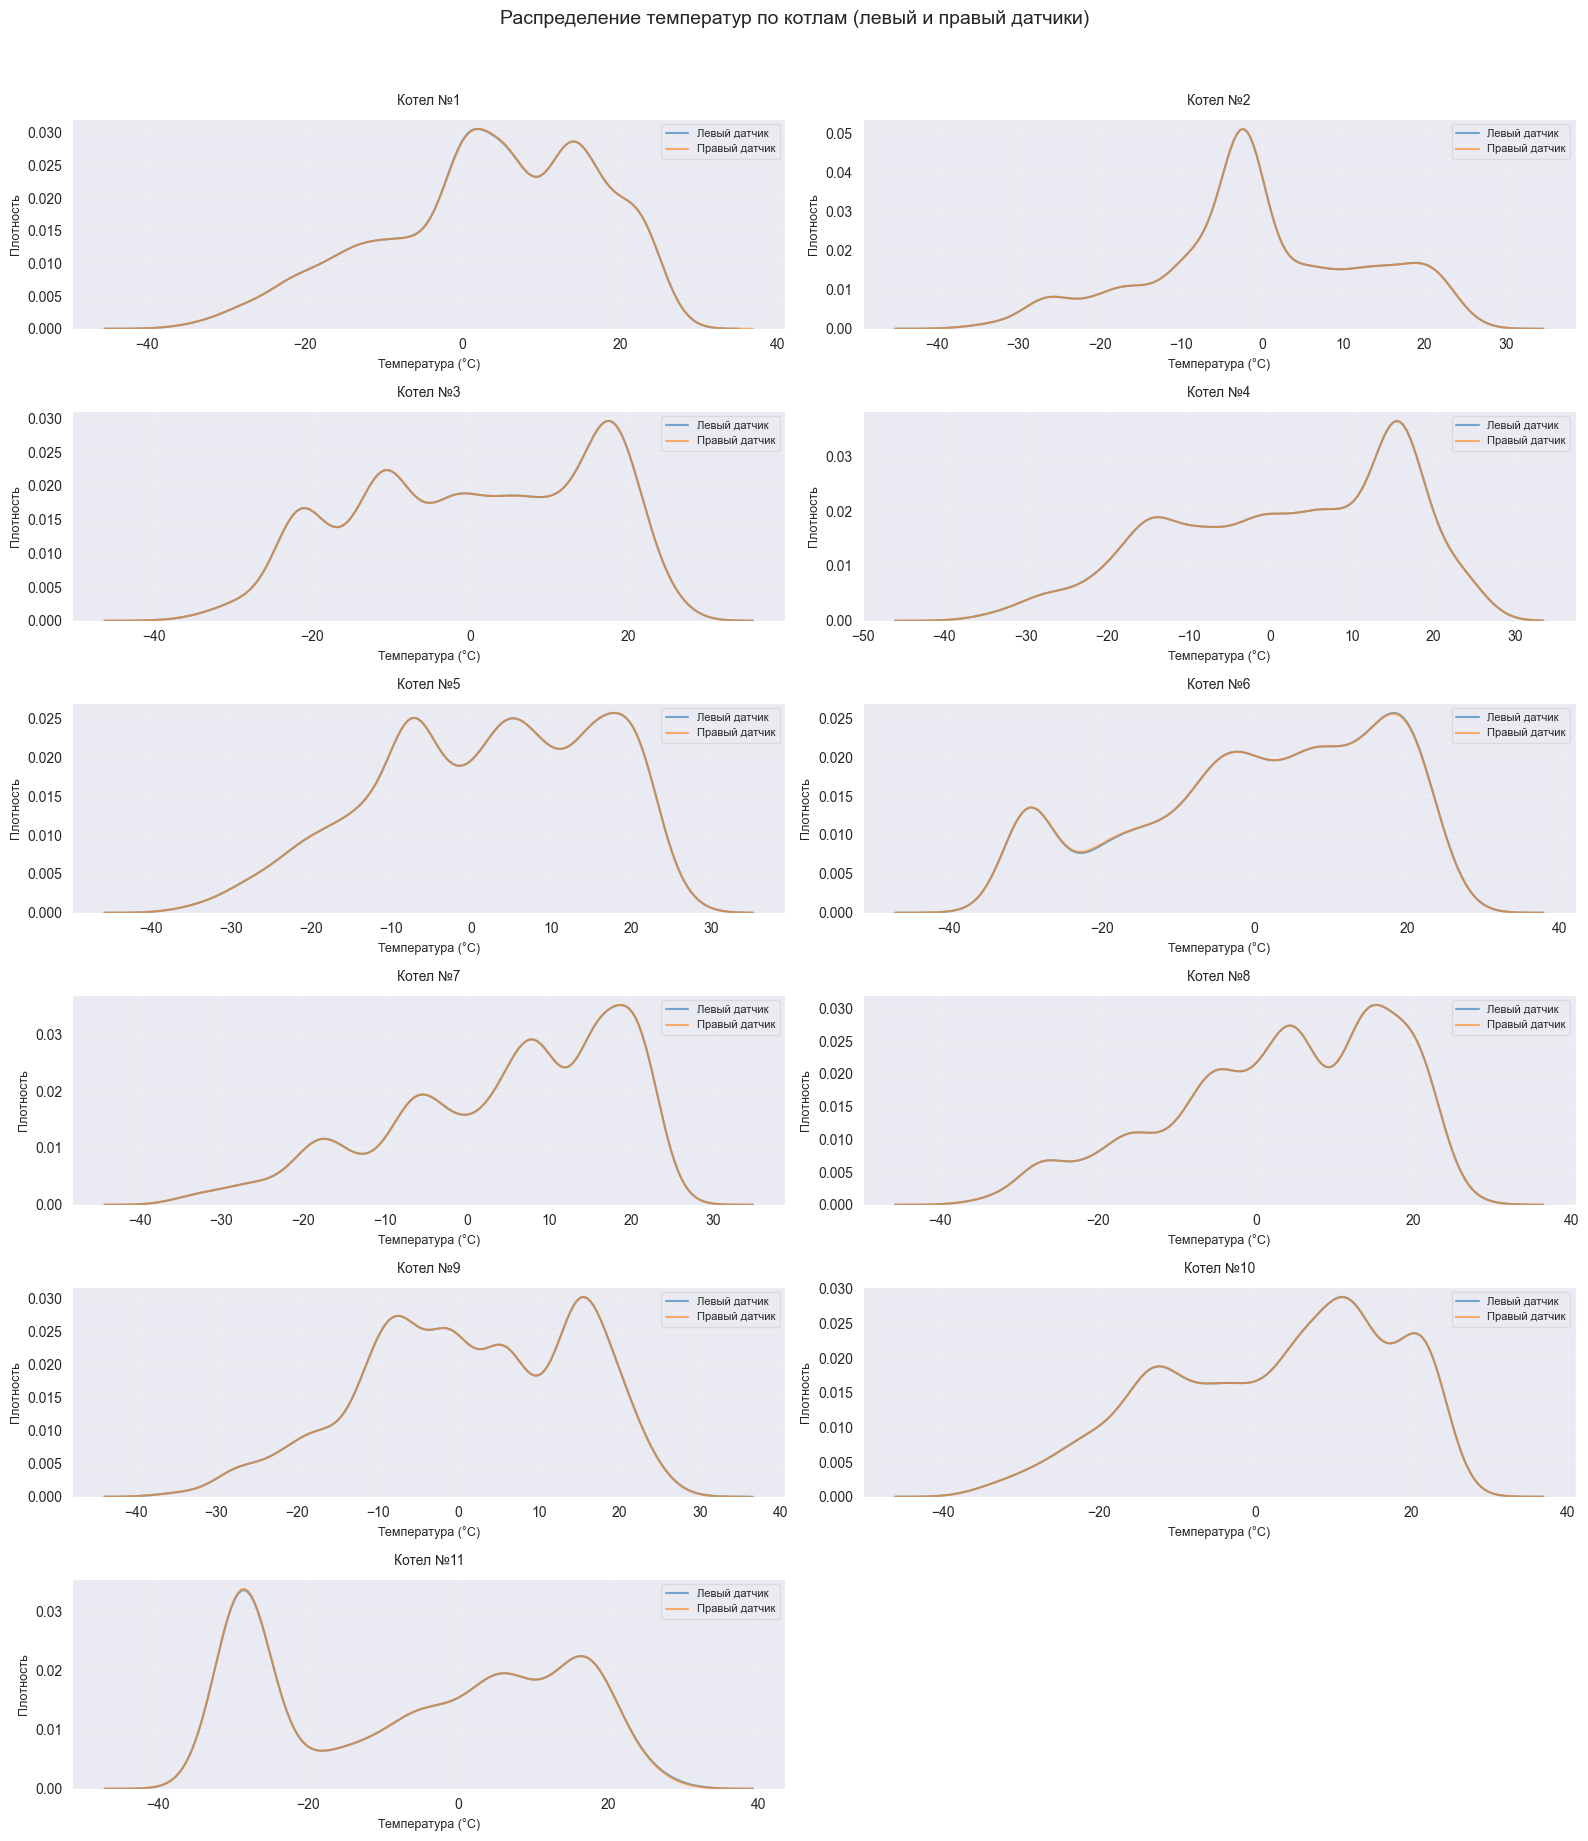

In [14]:
fig, axes = plt.subplots(6, 2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Распределение температур по котлам (левый и правый датчики)', y=1.02, fontsize=14)

for i, ax in enumerate(axes.flat, start=1):
    if i > 11:
        ax.axis('off')
        continue

    # KDE для левого датчика
    sns.kdeplot(data=full_data[f"BoilerTempColdAirLeft{i}"],
                ax=ax,
                label='Левый датчик',
                alpha=0.6,
                linewidth=1.5)

    # KDE для правого датчика
    sns.kdeplot(data=full_data[f"BoilerTempColdAirRight{i}"],
                ax=ax,
                label='Правый датчик',
                alpha=0.6,
                linewidth=1.5)

    # Настройка оформления
    ax.set_title(f'Котел №{i}', fontsize=10, pad=10)
    ax.set_xlabel('Температура (°C)', fontsize=9)
    ax.set_ylabel('Плотность', fontsize=9)
    ax.grid(True, alpha=0.2)
    ax.legend(fontsize=8, framealpha=0.5)

plt.tight_layout()
plt.show()

Исходя из увиденного, можно предположить, что выраженных различий между левым и правым значением не наблюдается. Также можно предположить, что между температурами котлов нет выраженной разницы значений у наблюдений

In [15]:
differences_df = (
    pd.concat(
        [
            (
                full_data[[f'BoilerTempColdAirLeft{i}', f'BoilerTempColdAirRight{i}']]
                .assign(Boiler=i)
                .assign(Date=full_data.index)
                .rename(columns={
                    f'BoilerTempColdAirLeft{i}': 'Temp_Left',
                    f'BoilerTempColdAirRight{i}': 'Temp_Right'
                })
                .dropna()
                .query("Temp_Left != Temp_Right")
            )
            for i in range(1, 12)
        ],
        ignore_index=True
    )
    .sort_values(['Boiler'])  # Сортировка по номеру котла
    .reset_index(drop=True)   # Сброс индекса для аккуратного вывода
)
differences_df

Temp_Left  Temp_Right  Boiler       Date
0        -3.7        28.8       1 2007-02-18
1        -6.6        -7.4       1 2010-03-14
2         2.0         2.9       1 2009-10-27
3         2.0         2.9       1 2009-10-26
4         2.0         2.9       1 2009-10-25
..        ...         ...     ...        ...
57       27.7       -27.7      11 2008-01-14
58       27.7       -27.7      11 2008-01-15
59       27.7       -27.7      11 2008-01-16
60       27.7       -27.7      11 2008-01-17
61       -2.6        -2.3      11 2015-12-08

[62 rows x 4 columns]

Наблюдается 62 различия за 9 лет. Большинство различий объясняются некоректной записи наблюдения. Отсутствие или наличие знака минус, разница в кол-ве знаках после запятой, не верная постановка знака запятой. Остальные различия связанны с работой станции, но при этом не являются аномалиями.

Посмотрим на работу котлов. Возьмем за абсолют температура воздуха слева как температуру воздуха всего котла и сравним с температурой все станции

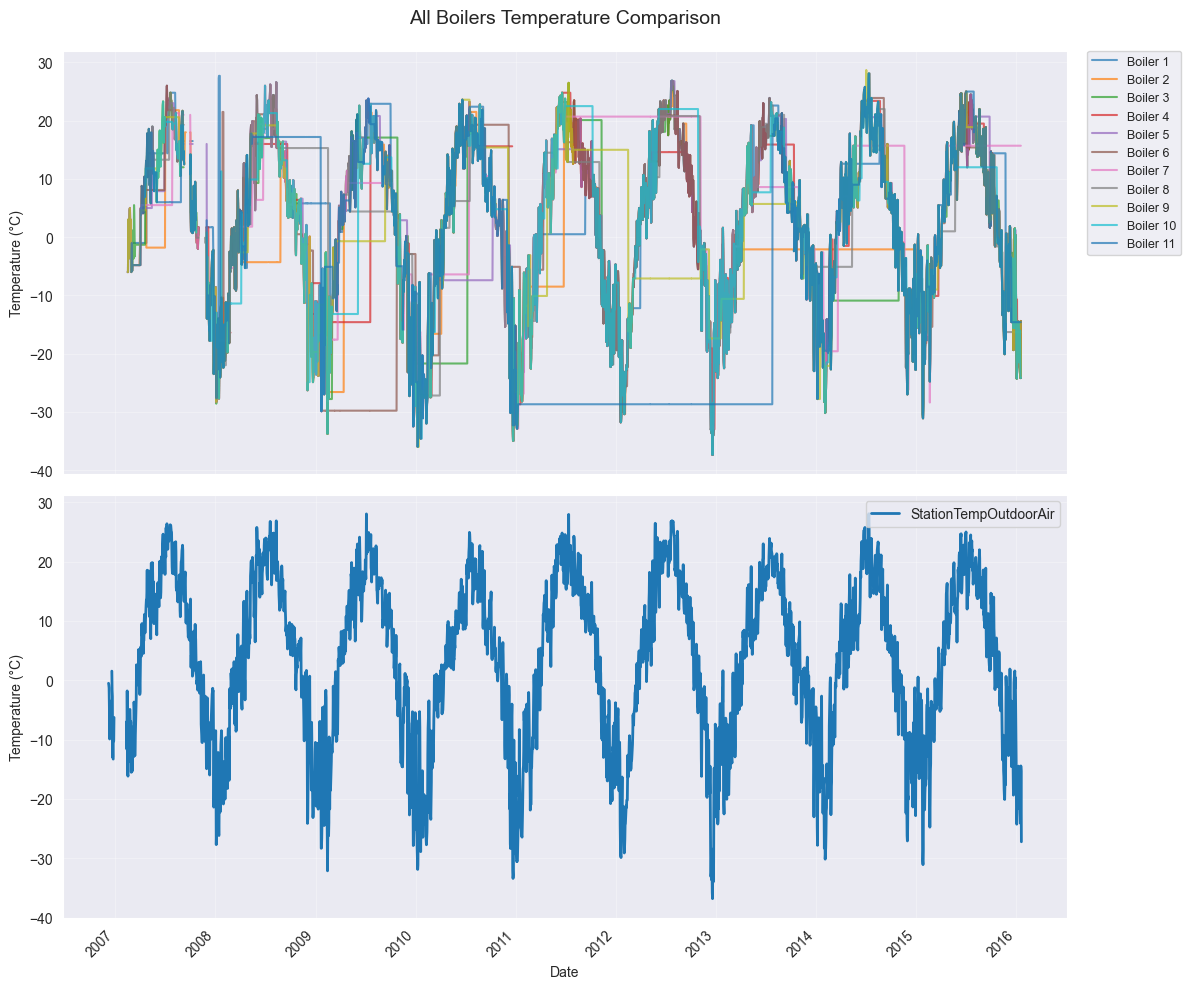

In [16]:
import matplotlib.pyplot as plt

# Создаем фигуру с двумя субполотнами (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.subplots_adjust(hspace=0.1)  # Расстояние между графиками

# Ресемплируем данные по дневным средним
daily = full_data.resample('D').mean()

# Верхний график - температуры всех котлов
for i in range(1, 12):
    ax1.plot(daily[f"BoilerTempColdAirLeft{i}"],
             label=f'Boiler {i}',
             alpha=0.7,
             linewidth=1.5)

ax1.set_title('All Boilers Temperature Comparison', pad=20, fontsize=14)
ax1.set_ylabel('Temperature (°C)', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=9)

# Нижний график - температура наружного воздуха
ax2.plot(daily["StationTempOutdoorAir"],
         label='StationTempOutdoorAir',
         linewidth=2)

ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Temperature (°C)', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10)

# Автоматическое форматирование дат на нижнем графике
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

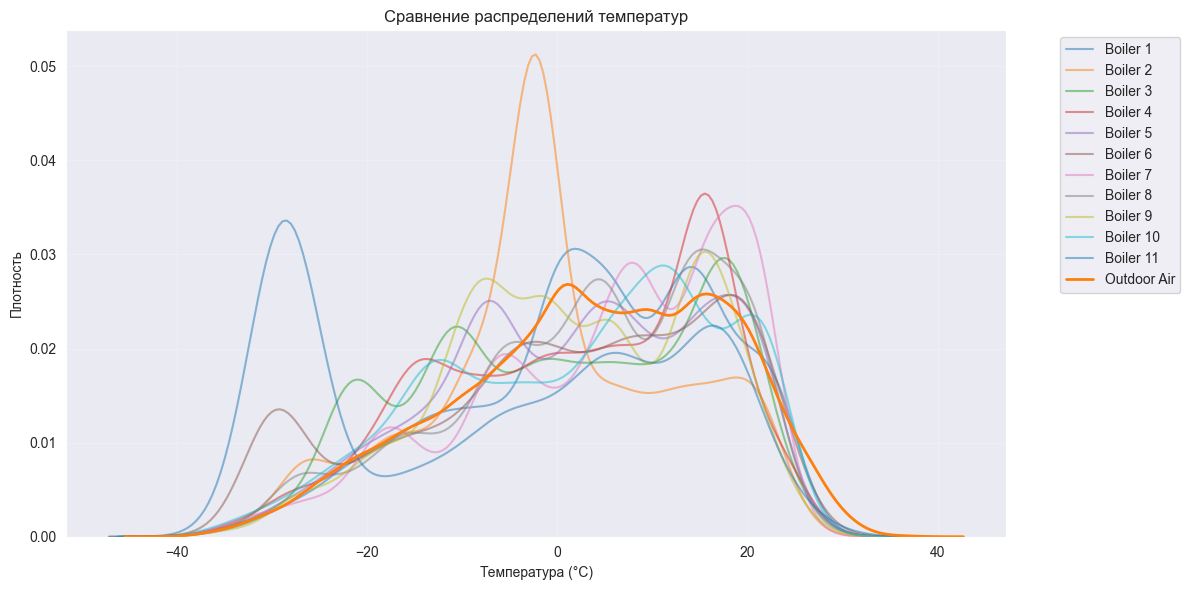

In [17]:
plt.figure(figsize=(12, 6))
for i in range(1, 12):
    sns.kdeplot(data=full_data[f"BoilerTempColdAirLeft{i}"],
                label=f'Boiler {i}',
                alpha=0.5)

sns.kdeplot(data=full_data["StationTempOutdoorAir"],
            label='Outdoor Air',
            linewidth=2)

plt.title('Сравнение распределений температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

Видно, что графики температуры в котлах сходятся. Также можно заметить, что температура наружного воздуха сходится с температурами в котлах.

**Вывод: Необходимо провести агрегацию температурных признаков среди котлов.**

#### Исследование признаков температуры питательного пара

Посмотрим на диаграммы температуры пара для каждой турбины

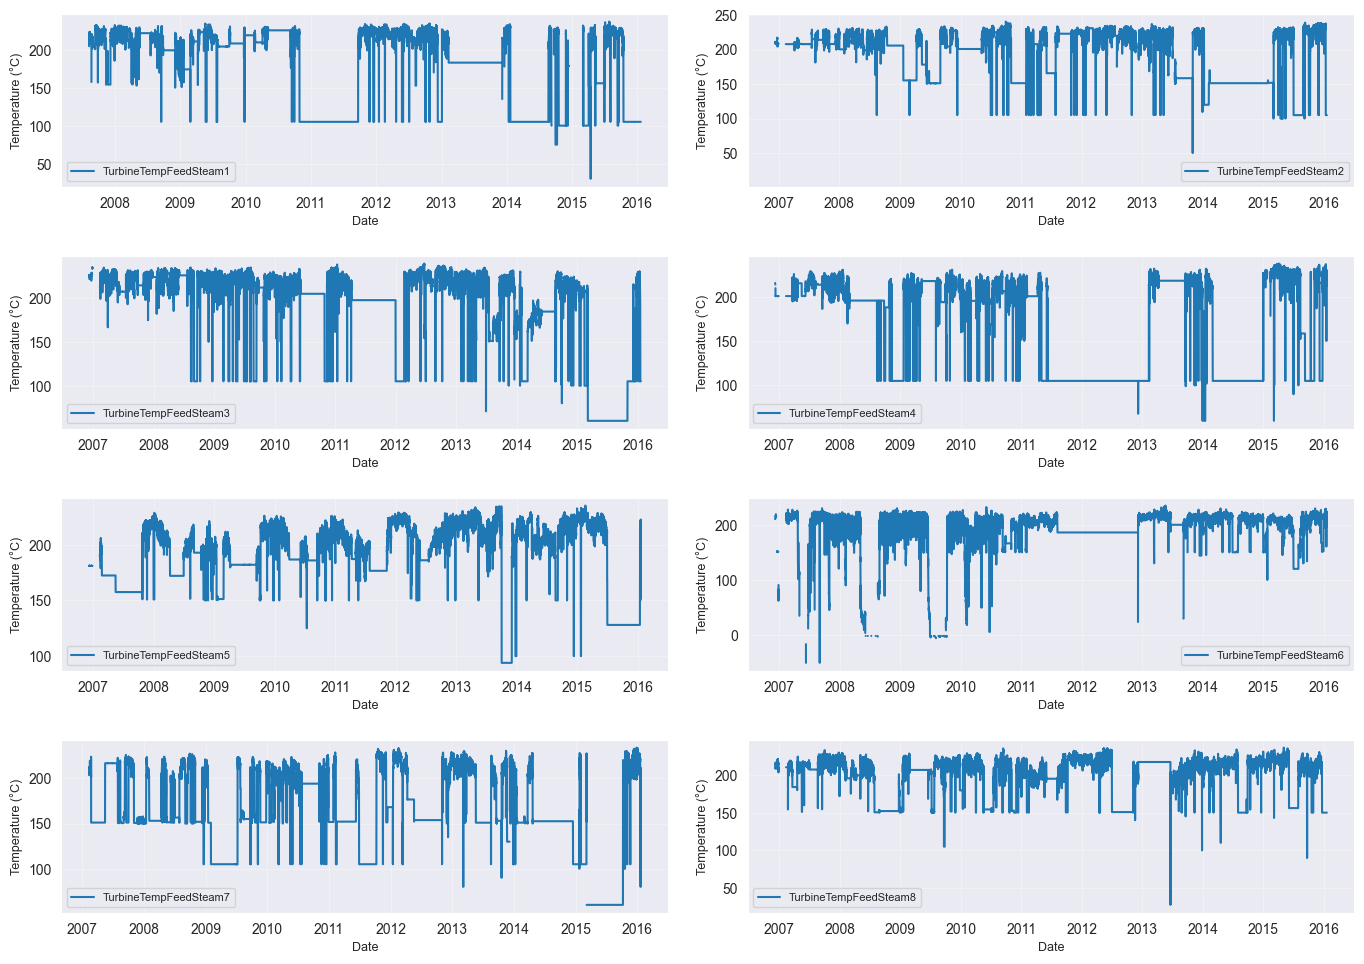

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))
daily = full_data

columns = ['TurbineTempFeedSteam1',
           'TurbineTempFeedSteam2',
           'TurbineTempFeedSteam3',
           'TurbineTempFeedSteam4',
           'TurbineTempFeedSteam5',
           'TurbineTempFeedSteam6',
           'TurbineTempFeedSteam7',
           'TurbineTempFeedSteam8',
           ]

for ax, col in zip(axes.flat, columns):
    ax.plot(daily[col], label=col)
    ax.set_ylabel('Temperature (°C)', fontsize=9)
    ax.set_xlabel('Date', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout(pad=2.0)
plt.show()

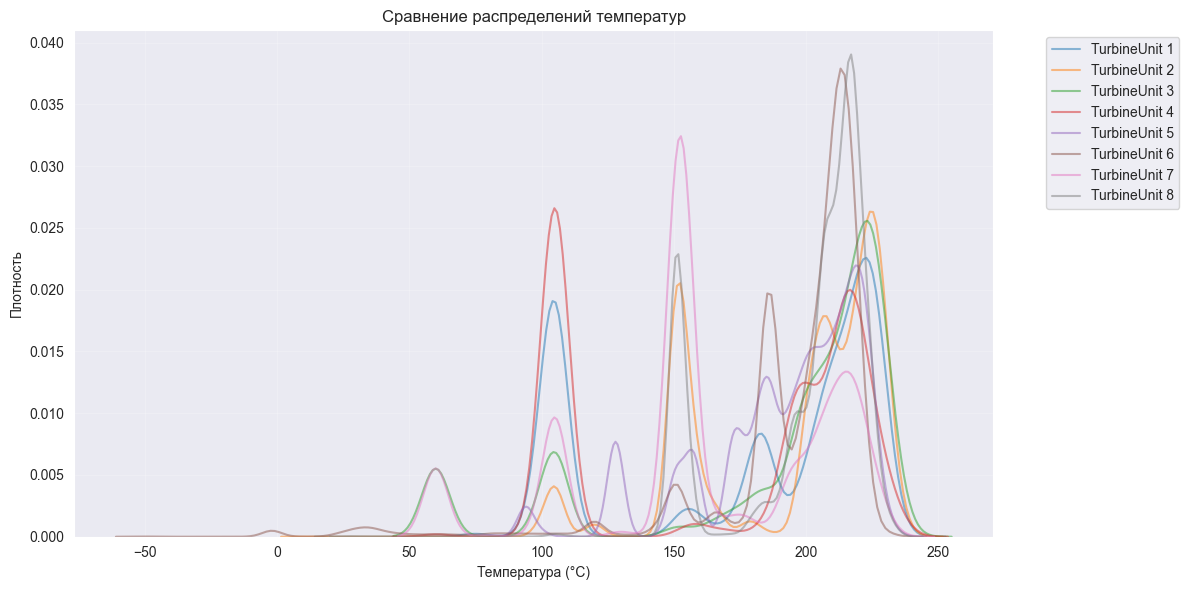

In [19]:
plt.figure(figsize=(12, 6))
for i in range(1, 9):
    sns.kdeplot(data=full_data[f"TurbineTempFeedSteam{i}"],
                label=f'TurbineUnit {i}',
                alpha=0.5)
plt.title('Сравнение распределений температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Вывод: Исходя из анализа предметной области и сравнения плотности признаков необходимо провести агрегацию.**

#### Агрегирование данных

Проведем агрегацию для температурных характеристик, характеристик мощности турбин и расхода топлива ОТП\
Температурные признаки агрегируем по минимальному, максимальному, медиальному значениям, также по моде и квантилям 25, 75.\
Исходя из анализа предметной области мощность и расход топлива ОТП агрегируем по сумме.

In [20]:
colBoiler = ['BoilerTempColdAirLeft1',
             'BoilerTempColdAirLeft2',
             'BoilerTempColdAirLeft3',
             'BoilerTempColdAirLeft4',
             'BoilerTempColdAirLeft5',
             'BoilerTempColdAirLeft6',
             'BoilerTempColdAirLeft7',
             'BoilerTempColdAirLeft8',
             'BoilerTempColdAirLeft9',
             'BoilerTempColdAirLeft10',
             'BoilerTempColdAirLeft11',
             'BoilerTempColdAirRight1',
             'BoilerTempColdAirRight2',
             'BoilerTempColdAirRight3',
             'BoilerTempColdAirRight4',
             'BoilerTempColdAirRight5',
             'BoilerTempColdAirRight6',
             'BoilerTempColdAirRight7',
             'BoilerTempColdAirRight8',
             'BoilerTempColdAirRight9',
             'BoilerTempColdAirRight10',
             'BoilerTempColdAirRight11']

colTurb = ['TurbineUnitPower1',
           'TurbineUnitPower2',
           'TurbineUnitPower3',
           'TurbineUnitPower4',
           'TurbineUnitPower5',
           'TurbineUnitPower6',
           'TurbineUnitPower7',
           'TurbineUnitPower8']

colOTP = ['StationConsumpOTPKaltan1',
          'StationConsumpOTPHP',
          'StationConsumpOTPOsinniki',
          'StationConsumpOTPTHF',
          'StationConsumpOTPKVOiT']

colWater = ['TurbineTempFeedSteam1',
            'TurbineTempFeedSteam2',
            'TurbineTempFeedSteam3',
            'TurbineTempFeedSteam4',
            'TurbineTempFeedSteam7',
            'TurbineTempFeedSteam5',
            'TurbineTempFeedSteam6',
            'TurbineTempFeedSteam8']

df = (
    full_data
    #Определение моды температуры воздуха
    .assign(BoilerTempColdAirMode = lambda x: x[colBoiler].apply(lambda y: y.value_counts(dropna = False).idxmax(), axis = 1))
    #Определение минимальной температуры воздуха на датчиках
    .assign(BoilerTempColdAirMin = lambda x: x[colBoiler].min(axis = 1))
    #Определение нижнего квартиля температуры воздуха на датчиках
    .assign(BoilerTempColdAirQ1 = lambda x: x[colBoiler].quantile(q = 0.25, axis = 1))
    #Определение медианной температуры воздуха на датчиках
    .assign(BoilerTempColdAirQ2 = lambda x: x[colBoiler].quantile(q = 0.5, axis = 1))
    #Определение верхнего квартиля температуры воздуха на датчиках
    .assign(BoilerTempColdAirQ3 = lambda x: x[colBoiler].quantile(q = 0.75, axis = 1))
    #Определение максимальной температуры воздуха на датчиках
    .assign(BoilerTempColdAirMax = lambda x: x[colBoiler].max(axis = 1))
    #Определение моды температуры воды
    .assign(TurbineTempFeedSteamMode = lambda x: x[colWater].apply(lambda y: y.value_counts(dropna = False).idxmax(), axis = 1))
    #Определение минимальной температуры воды на датчиках
    .assign(TurbineTempFeedSteamMin = lambda x: x[colWater].min(axis = 1))
    #Определение нижнего квартиля температуры воды на датчиках
    .assign(TurbineTempFeedSteamQ1 = lambda x: x[colWater].quantile(q = 0.25, axis = 1))
    #Определение медианной температуры воды на датчиках
    .assign(TurbineTempFeedSteamQ2 = lambda x: x[colWater].quantile(q = 0.5, axis = 1))
    #Определение верхнего квартиля температуры воды на датчиках
    .assign(TurbineTempFeedSteamQ3 = lambda x: x[colWater].quantile(q = 0.75, axis = 1))
    #Определение максимальной температуры воды на датчиках
    .assign(TurbineTempFeedSteamMax = lambda x: x[colWater].max(axis = 1))
    #Агрегация данных мощности турбин
    .assign(TurbinePowerSum = lambda x: x[colTurb].sum(axis=1))
    #Агрегация данных суммарного расхода ОТП топлива
    .assign(StationConsumpOTPSum = lambda x: x[colOTP].sum(axis=1))
    #Удаление ненужных столбцов
    .drop(columns = colBoiler + colTurb  + colOTP + colWater)
)
df

StationConsumpNaturalFuel  StationConsumpMasut  \
Date                                                                  
2006-12-01 11:00:00                        NaN                  NaN   
2006-12-01 12:00:00                        NaN                  NaN   
2006-12-01 13:00:00                        NaN                  NaN   
2006-12-01 14:00:00                        NaN                  NaN   
2006-12-01 15:00:00                        NaN                  NaN   
...                                        ...                  ...   
2016-01-20 05:00:00                        NaN                  NaN   
2016-01-20 06:00:00                        NaN                  NaN   
2016-01-20 07:00:00                        NaN                  NaN   
2016-01-20 08:00:00                        NaN                  NaN   
2016-01-20 09:00:00                        NaN                  NaN   

                     StationCoalAsh  StationCoalHumidity  \
Date                                                       
2006-12-01 11:00:00             NaN                  NaN   
2006-12-01 12:00:00             NaN                  NaN   
2006-12-01 13:00:00             NaN                  NaN   
2006-12-01 14:00:00             NaN                  NaN   
2006-12-01 15:00:00             NaN                  NaN   
...                             ...                  ...   
2016-01-20 05:00:00             NaN                  NaN   
2016-01-20 06:00:00             NaN                  NaN   
2016-01-20 07:00:00             NaN                  NaN   
2016-01-20 08:00:00             NaN                  NaN   
2016-01-20 09:00:00             NaN                  NaN   

                     StationTempOutdoorAir  \
Date                                         
2006-12-01 11:00:00                    NaN   
2006-12-01 12:00:00                    NaN   
2006-12-01 13:00:00                    NaN   
2006-12-01 14:00:00                    NaN   
2006-12-01 15:00:00                    NaN   
...                                    ...   
2016-01-20 05:00:00               -27.7334   
2016-01-20 06:00:00               -28.2680   
2016-01-20 07:00:00               -28.7335   
2016-01-20 08:00:00               -29.5294   
2016-01-20 09:00:00               -29.7366   

                     StationConsumpElectricityTurbineUnit  \
Date                                                        
2006-12-01 11:00:00                                   NaN   
2006-12-01 12:00:00                                   NaN   
2006-12-01 13:00:00                                   NaN   
2006-12-01 14:00:00                                   NaN   
2006-12-01 15:00:00                                   NaN   
...                                                   ...   
2016-01-20 05:00:00                                   NaN   
2016-01-20 06:00:00                                   NaN   
2016-01-20 07:00:00                                   NaN   
2016-01-20 08:00:00                                   NaN   
2016-01-20 09:00:00                                   NaN   

                     BoilerTempColdAirMode  BoilerTempColdAirMin  \
Date                                                               
2006-12-01 11:00:00                    NaN                   NaN   
2006-12-01 12:00:00                    NaN                   NaN   
2006-12-01 13:00:00                    NaN                   NaN   
2006-12-01 14:00:00                    NaN                   NaN   
2006-12-01 15:00:00                    NaN                   NaN   
...                                    ...                   ...   
2016-01-20 05:00:00                    NaN                   NaN   
2016-01-20 06:00:00                    NaN                   NaN   
2016-01-20 07:00:00                    NaN                   NaN   
2016-01-20 08:00:00                    NaN                   NaN   
2016-01-20 09:00:00                    NaN                   NaN   

                     BoilerTempColdAir

In [21]:
df.loc[df['TurbinePowerSum'] == 0, 'TurbinePowerSum'] = np.nan
df

StationConsumpNaturalFuel  StationConsumpMasut  \
Date                                                                  
2006-12-01 11:00:00                        NaN                  NaN   
2006-12-01 12:00:00                        NaN                  NaN   
2006-12-01 13:00:00                        NaN                  NaN   
2006-12-01 14:00:00                        NaN                  NaN   
2006-12-01 15:00:00                        NaN                  NaN   
...                                        ...                  ...   
2016-01-20 05:00:00                        NaN                  NaN   
2016-01-20 06:00:00                        NaN                  NaN   
2016-01-20 07:00:00                        NaN                  NaN   
2016-01-20 08:00:00                        NaN                  NaN   
2016-01-20 09:00:00                        NaN                  NaN   

                     StationCoalAsh  StationCoalHumidity  \
Date                                                       
2006-12-01 11:00:00             NaN                  NaN   
2006-12-01 12:00:00             NaN                  NaN   
2006-12-01 13:00:00             NaN                  NaN   
2006-12-01 14:00:00             NaN                  NaN   
2006-12-01 15:00:00             NaN                  NaN   
...                             ...                  ...   
2016-01-20 05:00:00             NaN                  NaN   
2016-01-20 06:00:00             NaN                  NaN   
2016-01-20 07:00:00             NaN                  NaN   
2016-01-20 08:00:00             NaN                  NaN   
2016-01-20 09:00:00             NaN                  NaN   

                     StationTempOutdoorAir  \
Date                                         
2006-12-01 11:00:00                    NaN   
2006-12-01 12:00:00                    NaN   
2006-12-01 13:00:00                    NaN   
2006-12-01 14:00:00                    NaN   
2006-12-01 15:00:00                    NaN   
...                                    ...   
2016-01-20 05:00:00               -27.7334   
2016-01-20 06:00:00               -28.2680   
2016-01-20 07:00:00               -28.7335   
2016-01-20 08:00:00               -29.5294   
2016-01-20 09:00:00               -29.7366   

                     StationConsumpElectricityTurbineUnit  \
Date                                                        
2006-12-01 11:00:00                                   NaN   
2006-12-01 12:00:00                                   NaN   
2006-12-01 13:00:00                                   NaN   
2006-12-01 14:00:00                                   NaN   
2006-12-01 15:00:00                                   NaN   
...                                                   ...   
2016-01-20 05:00:00                                   NaN   
2016-01-20 06:00:00                                   NaN   
2016-01-20 07:00:00                                   NaN   
2016-01-20 08:00:00                                   NaN   
2016-01-20 09:00:00                                   NaN   

                     BoilerTempColdAirMode  BoilerTempColdAirMin  \
Date                                                               
2006-12-01 11:00:00                    NaN                   NaN   
2006-12-01 12:00:00                    NaN                   NaN   
2006-12-01 13:00:00                    NaN                   NaN   
2006-12-01 14:00:00                    NaN                   NaN   
2006-12-01 15:00:00                    NaN                   NaN   
...                                    ...                   ...   
2016-01-20 05:00:00                    NaN                   NaN   
2016-01-20 06:00:00                    NaN                   NaN   
2016-01-20 07:00:00                    NaN                   NaN   
2016-01-20 08:00:00                    NaN                   NaN   
2016-01-20 09:00:00                    NaN                   NaN   

                     BoilerTempColdAir

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80087 entries, 2006-12-01 11:00:00 to 2016-01-20 09:00:00
Freq: h
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   StationConsumpNaturalFuel             3224 non-null   float64
 1   StationConsumpMasut                   2446 non-null   float64
 2   StationCoalAsh                        3222 non-null   float64
 3   StationCoalHumidity                   3222 non-null   float64
 4   StationTempOutdoorAir                 78435 non-null  float64
 5   StationConsumpElectricityTurbineUnit  3226 non-null   float64
 6   BoilerTempColdAirMode                 3161 non-null   float64
 7   BoilerTempColdAirMin                  3221 non-null   float64
 8   BoilerTempColdAirQ1                   3221 non-null   float64
 9   BoilerTempColdAirQ2                   3221 non-null   float64
 10  BoilerTempColdAirQ3                   3

In [23]:
df.shape

(80087, 20)

In [24]:
df.isnull().sum()

StationConsumpNaturalFuel               76863
StationConsumpMasut                     77641
StationCoalAsh                          76865
StationCoalHumidity                     76865
StationTempOutdoorAir                    1652
StationConsumpElectricityTurbineUnit    76861
BoilerTempColdAirMode                   76926
BoilerTempColdAirMin                    76866
BoilerTempColdAirQ1                     76866
BoilerTempColdAirQ2                     76866
BoilerTempColdAirQ3                     76866
BoilerTempColdAirMax                    76866
TurbineTempFeedSteamMode                 7961
TurbineTempFeedSteamMin                  1636
TurbineTempFeedSteamQ1                   1636
TurbineTempFeedSteamQ2                   1636
TurbineTempFeedSteamQ3                   1636
TurbineTempFeedSteamMax                  1636
TurbinePowerSum                          1635
StationConsumpOTPSum                        0
dtype: int64

### Многосезонный анализ выходной мощности

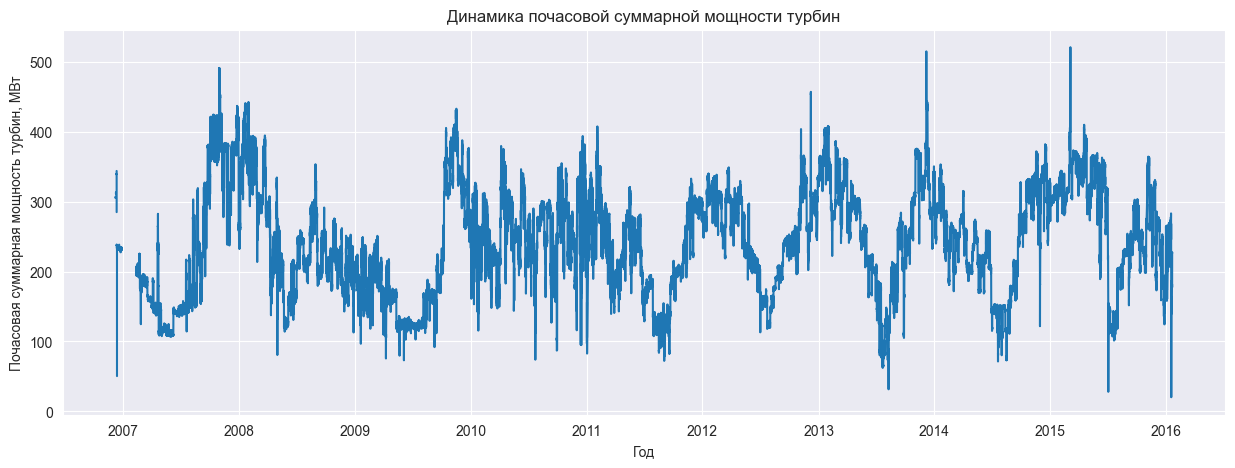

In [25]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df["TurbinePowerSum"])
ax.set_xlabel('Год')
ax.set_ylabel('Почасовая суммарная мощность турбин, МВт')
ax.set_title('Динамика почасовой суммарной мощности турбин')
plt.show()

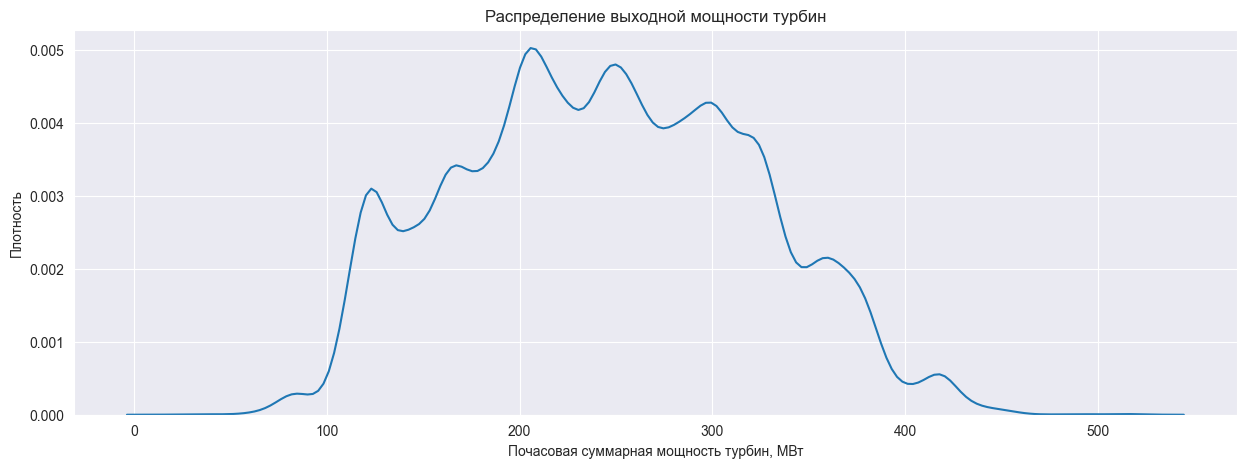

In [26]:
fig, ax = plt.subplots(figsize = (15,5))
sns.kdeplot(data = df, x="TurbinePowerSum", ax = ax)
ax.set_xlabel('Почасовая суммарная мощность турбин, МВт')
ax.set_ylabel('Плотность')
ax.set_title('Распределение выходной мощности турбин')
plt.show()

#### Многомерный анализ: годы

In [27]:
df['Year'] = df.index.year
df['Year'].head(3)

Date
2006-12-01 11:00:00    2006
2006-12-01 12:00:00    2006
2006-12-01 13:00:00    2006
Freq: h, Name: Year, dtype: int32

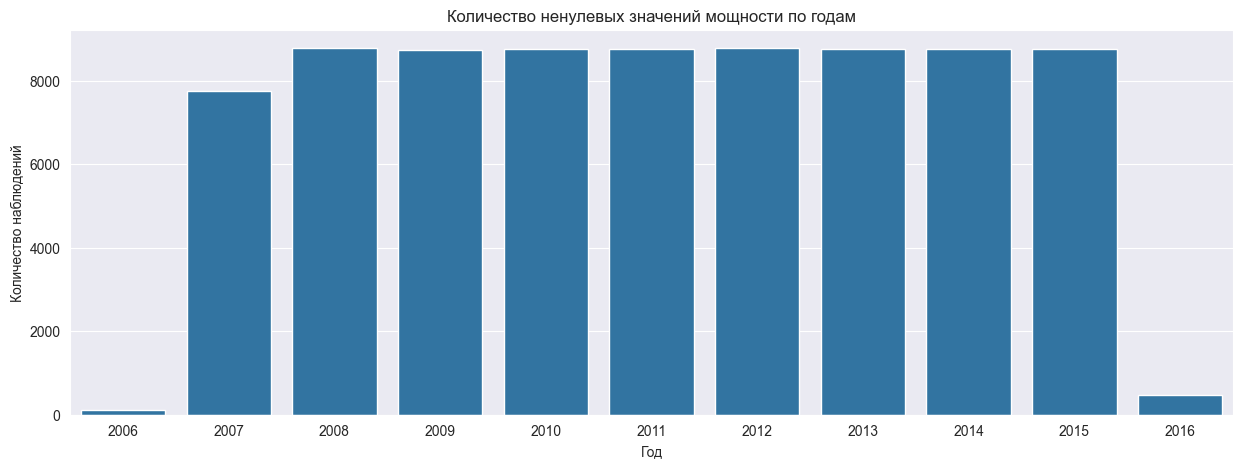

In [28]:
fig, ax = plt.subplots(figsize = (15,5))
sns.countplot(data = df[["TurbinePowerSum", "Year"]].dropna(subset = "TurbinePowerSum"), x = "Year", ax = ax)
ax.set_xlabel('Год')
ax.set_ylabel('Количество наблюдений')
ax.set_title('Количество ненулевых значений мощности по годам')
plt.show()

Убираем 2006 и 2016 из датасета, так как недостаточно наблюдений.

In [29]:
df = df[(df['Year']>2007)&(df['Year']<2016)]

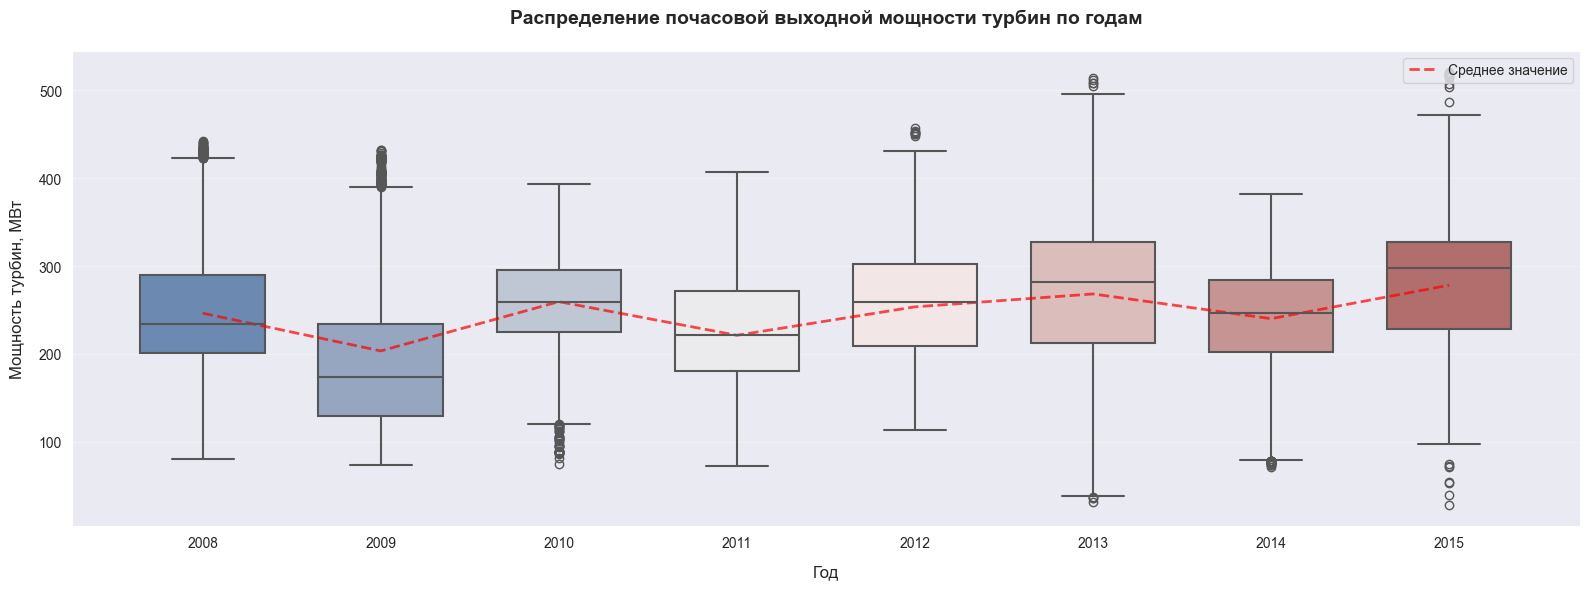

In [30]:
plt.figure(figsize=(16, 6))

# Строим boxplot с добавлением средних значений
ax = sns.boxplot(data=df, x="Year", y="TurbinePowerSum",
                palette="vlag",  # Приятная цветовая схема
                width=0.7,       # Ширина боксов
                linewidth=1.5)    # Толщина линий

# Настраиваем оформление
plt.title('Распределение почасовой выходной мощности турбин по годам',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12, labelpad=10)
plt.ylabel('Мощность турбин, МВт', fontsize=12, labelpad=10)

# Добавляем среднюю линию для общего тренда
mean_values = df.groupby('Year')['TurbinePowerSum'].mean()
ax.plot(mean_values.index.astype(str), mean_values.values,
       'r--', linewidth=2, alpha=0.7, label='Среднее значение')

# Настраиваем сетку и легенду
ax.grid(True, axis='y', alpha=0.3)
ax.legend(loc='upper right', fontsize=10)

# Автоматически регулируем отступы
plt.tight_layout()
plt.show()

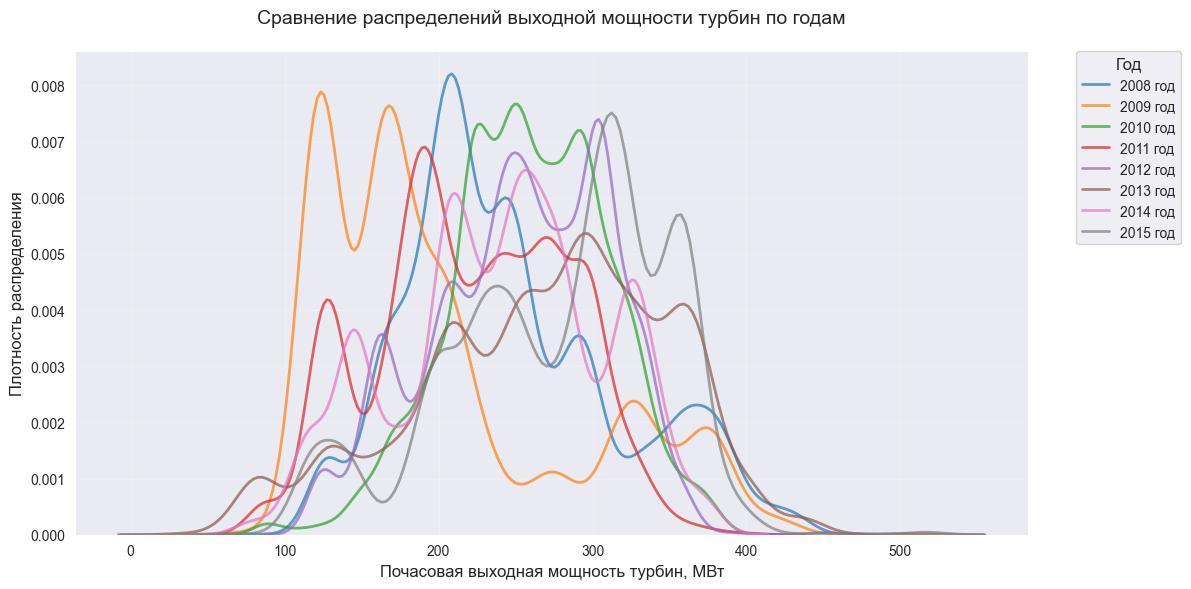

In [31]:
plt.figure(figsize=(12, 6))

for year in range(2008, 2016):
    sns.kdeplot(data=df[df['Year'] == year],
                x="TurbinePowerSum",
                label=f'{year} год',
                alpha=0.7,
                linewidth=2)

# Настраиваем оформление
plt.title('Сравнение распределений выходной мощности турбин по годам', pad=20, fontsize=14)
plt.xlabel('Почасовая выходная мощность турбин, МВт', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.grid(True, alpha=0.2)

# Добавляем легенду с выносом за пределы графика
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           title='Год',
           title_fontsize=12)

plt.tight_layout()
plt.show()

In [32]:
df.groupby('Year').agg({'TurbinePowerSum': ['min', 'max']})

TurbinePowerSum          
                 min       max
Year                          
2008         80.6633  442.3186
2009         73.0782  432.6719
2010         73.9755  393.6128
2011         72.2390  407.3574
2012        113.0455  456.7891
2013         31.6280  514.6267
2014         71.4096  381.8854
2015         28.0537  520.5725

#### Многомерный анализ: Энергопроизводство по сезонам

**Сезонная информация**

Сгенерируем четыре климатологических сезона следующим образом.

>* **(1) Зима**: С декабря по март
>* **(2) Весна**: Апрель - май
>* **(3) Лето**: Июнь - август
>* **(4) Осень**: Сентябрь - ноябрь

Мы можем создать сезонный признак на основе индекса месяца следующим образом:

In [33]:
def month2seasons(x):
    if x in [12, 1, 2, 3]:
        season = 1
    elif x in [4, 5]:
        season = 2
    elif x in [6, 7, 8]:
        season = 3
    elif x in [9, 10, 11]:
        season = 4
    return season

df = df.reset_index()
df = df.assign(Season = df['Date'].dt.month.apply(month2seasons))
df = df.set_index('Date')
df['Season'].head(3)

Date
2008-01-01 00:00:00    1
2008-01-01 01:00:00    1
2008-01-01 02:00:00    1
Name: Season, dtype: int64

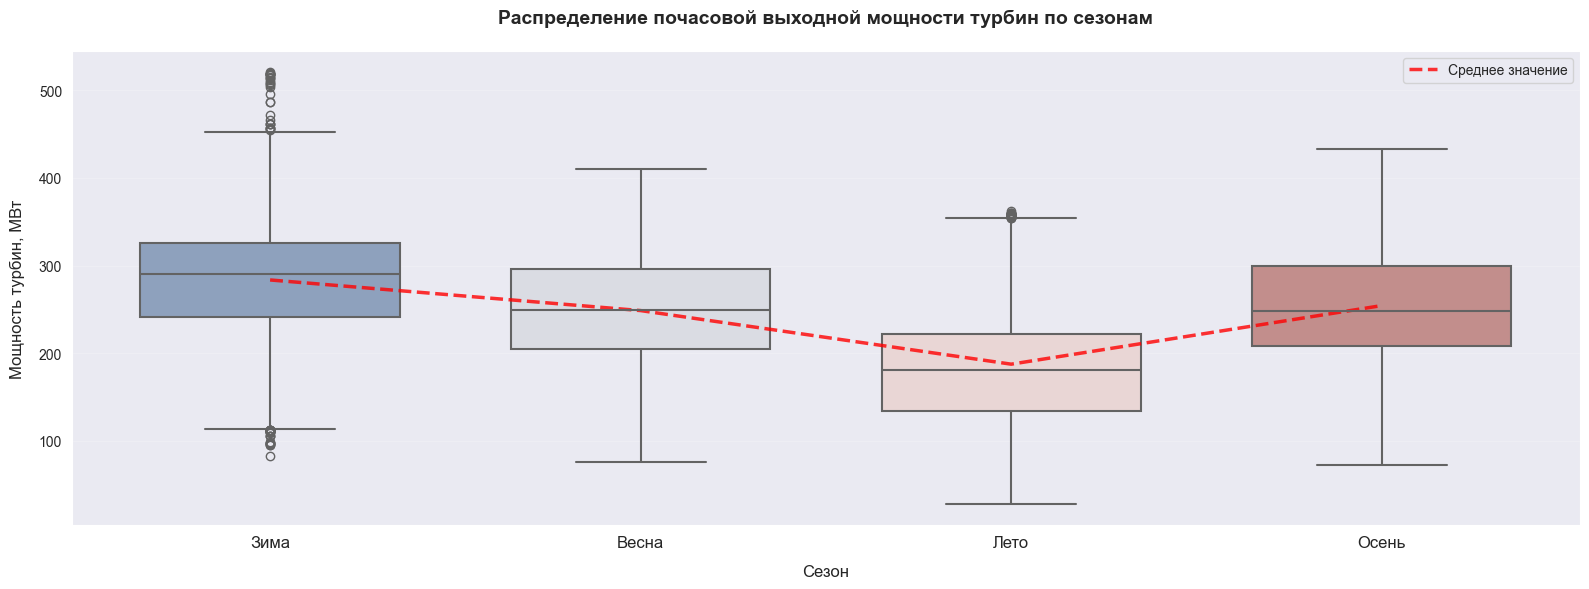

In [34]:
plt.figure(figsize=(16, 6))
daily = df.copy()
# Создаем порядок и названия сезонов
season_order = ['Зима', 'Весна', 'Лето', 'Осень']

# Преобразуем числовые сезоны в текстовые (если нужно)
if daily['Season'].dtype == 'int64':
    season_mapping = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}
    daily['Season_Name'] = daily['Season'].map(season_mapping)
    season_data = 'Season_Name'
else:
    season_data = 'Season'

# Строим boxplot
ax = sns.boxplot(data=daily, x=season_data, y="TurbinePowerSum",
                 palette="vlag",
                order=season_order,
                width=0.7,
                linewidth=1.5)

# Настраиваем оформление
plt.title('Распределение почасовой выходной мощности турбин по сезонам',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Сезон', fontsize=12, labelpad=10)
plt.ylabel('Мощность турбин, МВт', fontsize=12, labelpad=10)

# Добавляем средние значения
mean_values = daily.groupby(season_data)['TurbinePowerSum'].mean().reindex(season_order)
ax.plot(mean_values.index, mean_values.values,
       'r--', linewidth=2.5, alpha=0.8, label='Среднее значение')

# Дополнительные улучшения
ax.grid(True, axis='y', alpha=0.2)
ax.legend(loc='upper right', fontsize=10)

# Увеличиваем шрифт подписей на оси X
ax.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

Зимой - самая высокая средняя мощность и максимальный разброс значений

Летом - средняя мощность самая низкая по всем сезонам

Весной - стабильное производство без наличия "выбросов"

Осенью - средняя мощность растет и также присутствуют выбросы

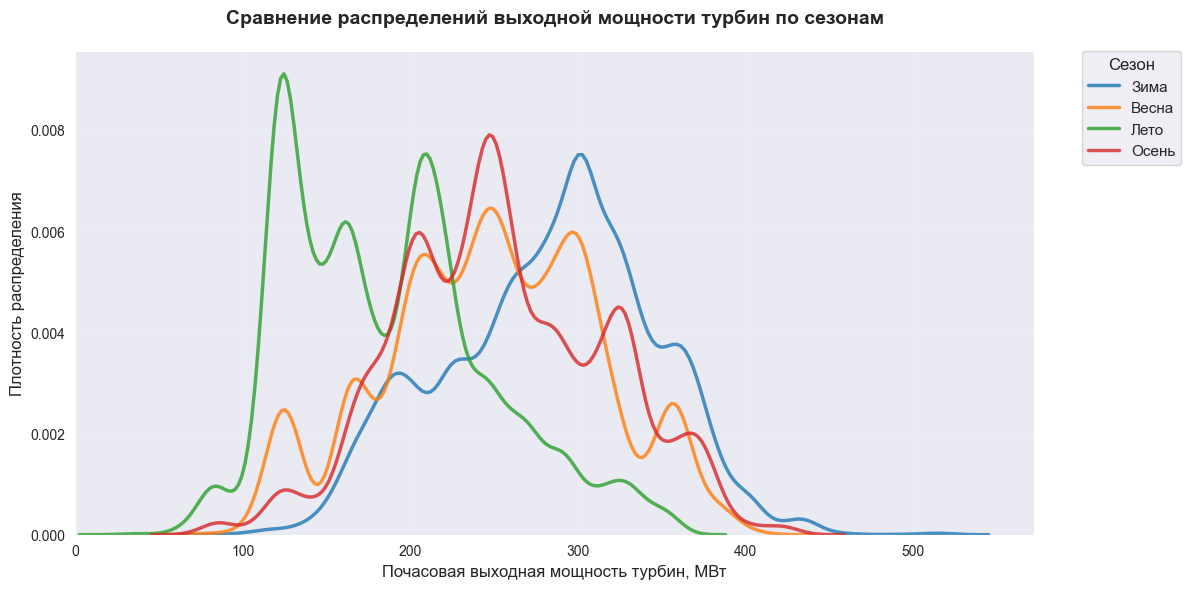

In [35]:
plt.figure(figsize=(12, 6))

# Создаем словарь для соответствия номеров сезонов и их названий
season_names = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}

# Строим KDE для каждого сезона
for season_num in range(1, 5):
    sns.kdeplot(data=daily[daily['Season'] == season_num],
                x="TurbinePowerSum",
                label=season_names[season_num],
                alpha=0.8,
                linewidth=2.5)

# Настраиваем оформление
plt.title('Сравнение распределений выходной мощности турбин по сезонам',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Почасовая выходная мощность турбин, МВт', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.grid(True, alpha=0.2)

# Добавляем легенду
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           title='Сезон',
           title_fontsize=12,
           fontsize=11)

# Устанавливаем разумные пределы осей
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

In [36]:
df.groupby('Season').agg({'TurbinePowerSum': ['min', 'max']})

TurbinePowerSum          
                   min       max
Season                          
1              82.7061  520.5725
2              75.6812  409.7308
3              28.0537  362.8134
4              72.2390  432.6719

#### Многомерный анализ: дни недели

In [37]:
df['DayOfWeek'] = df.index.dayofweek + 1
df['DayOfWeek'].head(3)

Date
2008-01-01 00:00:00    2
2008-01-01 01:00:00    2
2008-01-01 02:00:00    2
Name: DayOfWeek, dtype: int32

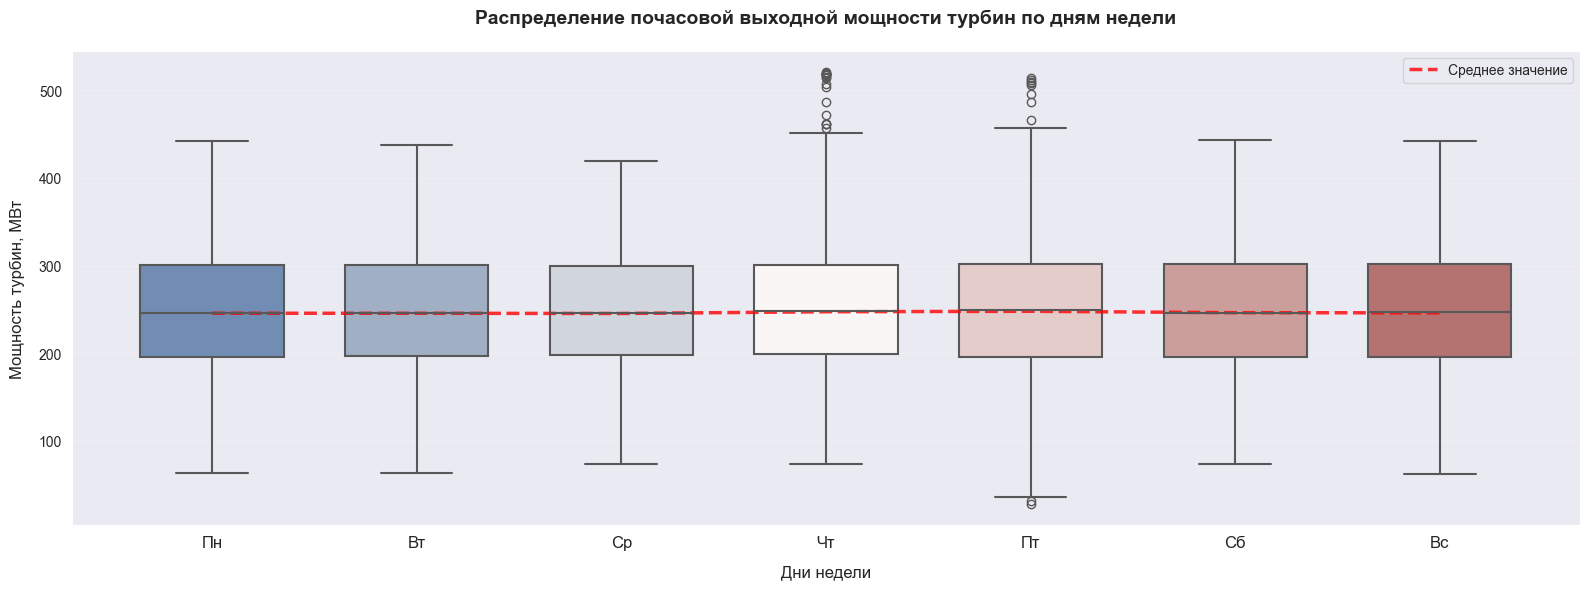

In [38]:
plt.figure(figsize=(16, 6))
daily = df.copy()
# Создаем порядок и названия сезонов
dayofweek_order = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

# Преобразуем числовые сезоны в текстовые (если нужно)
if daily['DayOfWeek'].dtype == 'int32':
    dayofweek_mapping = {1 : 'Пн', 2 : 'Вт', 3 : 'Ср', 4 : 'Чт', 5 : 'Пт', 6 : 'Сб', 7 : 'Вс'}
    daily['DayOfWeek_Name'] = daily['DayOfWeek'].map(dayofweek_mapping)
    dayofweek_data = 'DayOfWeek_Name'
else:
    dayofweek_data = 'DayOfWeek'

# Строим boxplot
ax = sns.boxplot(data=daily, x=dayofweek_data, y="TurbinePowerSum",
                 palette="vlag",
                order=dayofweek_order,
                width=0.7,
                linewidth=1.5)

# Настраиваем оформление
plt.title('Распределение почасовой выходной мощности турбин по дням недели',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Дни недели', fontsize=12, labelpad=10)
plt.ylabel('Мощность турбин, МВт', fontsize=12, labelpad=10)

# Добавляем средние значения
mean_values = daily.groupby(dayofweek_data)['TurbinePowerSum'].mean().reindex(dayofweek_order)
ax.plot(mean_values.index, mean_values.values,
       'r--', linewidth=2.5, alpha=0.8, label='Среднее значение')

# Дополнительные улучшения
ax.grid(True, axis='y', alpha=0.2)
ax.legend(loc='upper right', fontsize=10)

# Увеличиваем шрифт подписей на оси X
ax.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

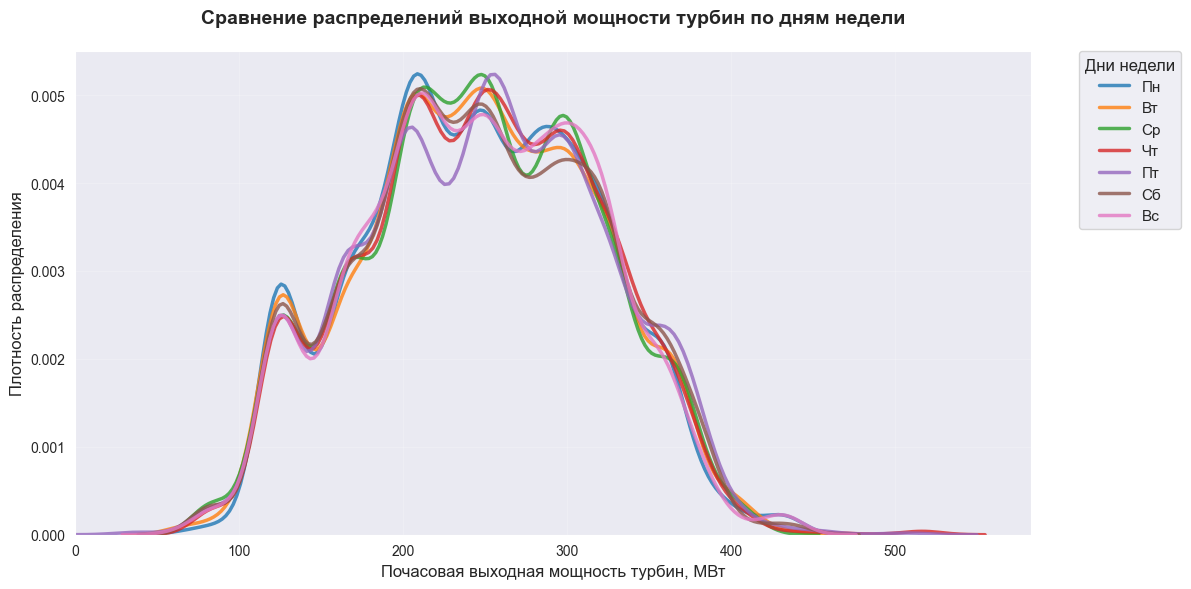

In [39]:
plt.figure(figsize=(12, 6))

dayofweek_names = {1 : 'Пн', 2 : 'Вт', 3 : 'Ср', 4 : 'Чт', 5 : 'Пт', 6 : 'Сб', 7 : 'Вс'}
for dayofweek_num in range(1, 8):
    sns.kdeplot(data=daily[daily['DayOfWeek'] == dayofweek_num],
                x="TurbinePowerSum",
                label=dayofweek_names[dayofweek_num],
                alpha=0.8,
                linewidth=2.5)

# Настраиваем оформление
plt.title('Сравнение распределений выходной мощности турбин по дням недели',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Почасовая выходная мощность турбин, МВт', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.grid(True, alpha=0.2)

# Добавляем легенду
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           title='Дни недели',
           title_fontsize=12,
           fontsize=11)

# Устанавливаем разумные пределы осей
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

In [40]:
df.groupby('DayOfWeek').agg({'TurbinePowerSum': ['min', 'max']})

TurbinePowerSum          
                      min       max
DayOfWeek                          
1                 62.8495  441.9365
2                 62.8967  437.7388
3                 73.8077  419.4022
4                 73.0782  520.5725
5                 28.0537  514.6267
6                 72.9470  443.3296
7                 62.6249  442.1287

#### Многомерный анализ: Производство энергии в зависимости от сезона и года

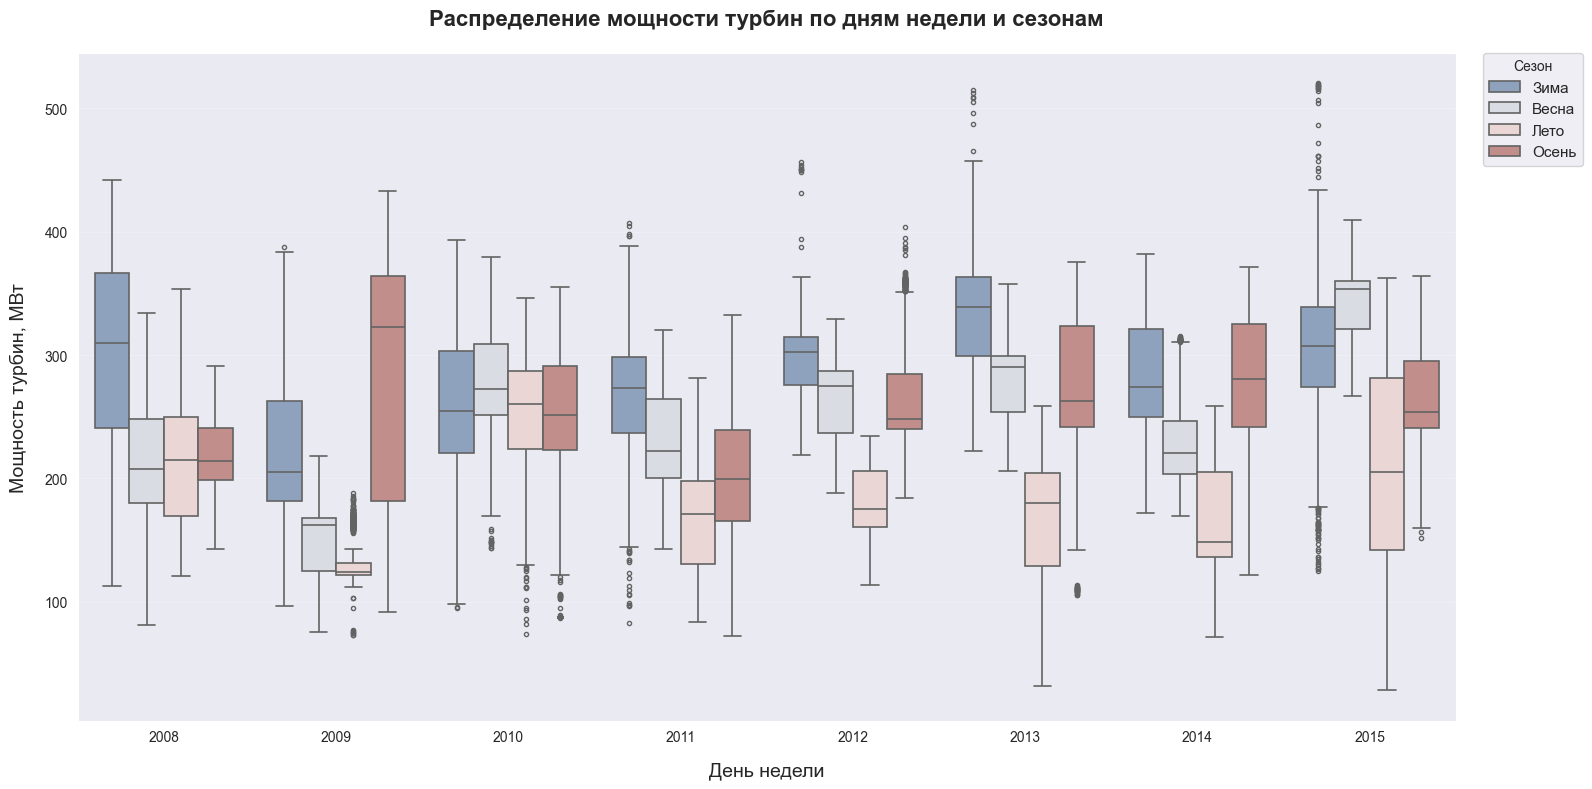

In [41]:
plt.figure(figsize=(16, 8))

if daily['Season'].dtype == 'int64':
    season_mapping = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}
    daily['Season_Name'] = daily['Season'].map(season_mapping)
    season_data = 'Season_Name'
else:
    season_data = 'Season'

# Строим boxplot с группировкой
ax = sns.boxplot(data=daily, x=daily['Year'], y="TurbinePowerSum", hue=season_data,
                 palette="vlag",
                order=daily['Year'],
                width=0.8,
                linewidth=1.2,
                fliersize=3)

# Настраиваем оформление
plt.title('Распределение мощности турбин по дням недели и сезонам',
          pad=20, fontsize=16, fontweight='bold')
plt.xlabel('День недели', fontsize=14, labelpad=12)
plt.ylabel('Мощность турбин, МВт', fontsize=14, labelpad=12)

ax.legend(title='Сезон',
          bbox_to_anchor=(1.02, 1),
          loc='upper left',
          borderaxespad=0.,
          fontsize=11)

ax.grid(True, axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

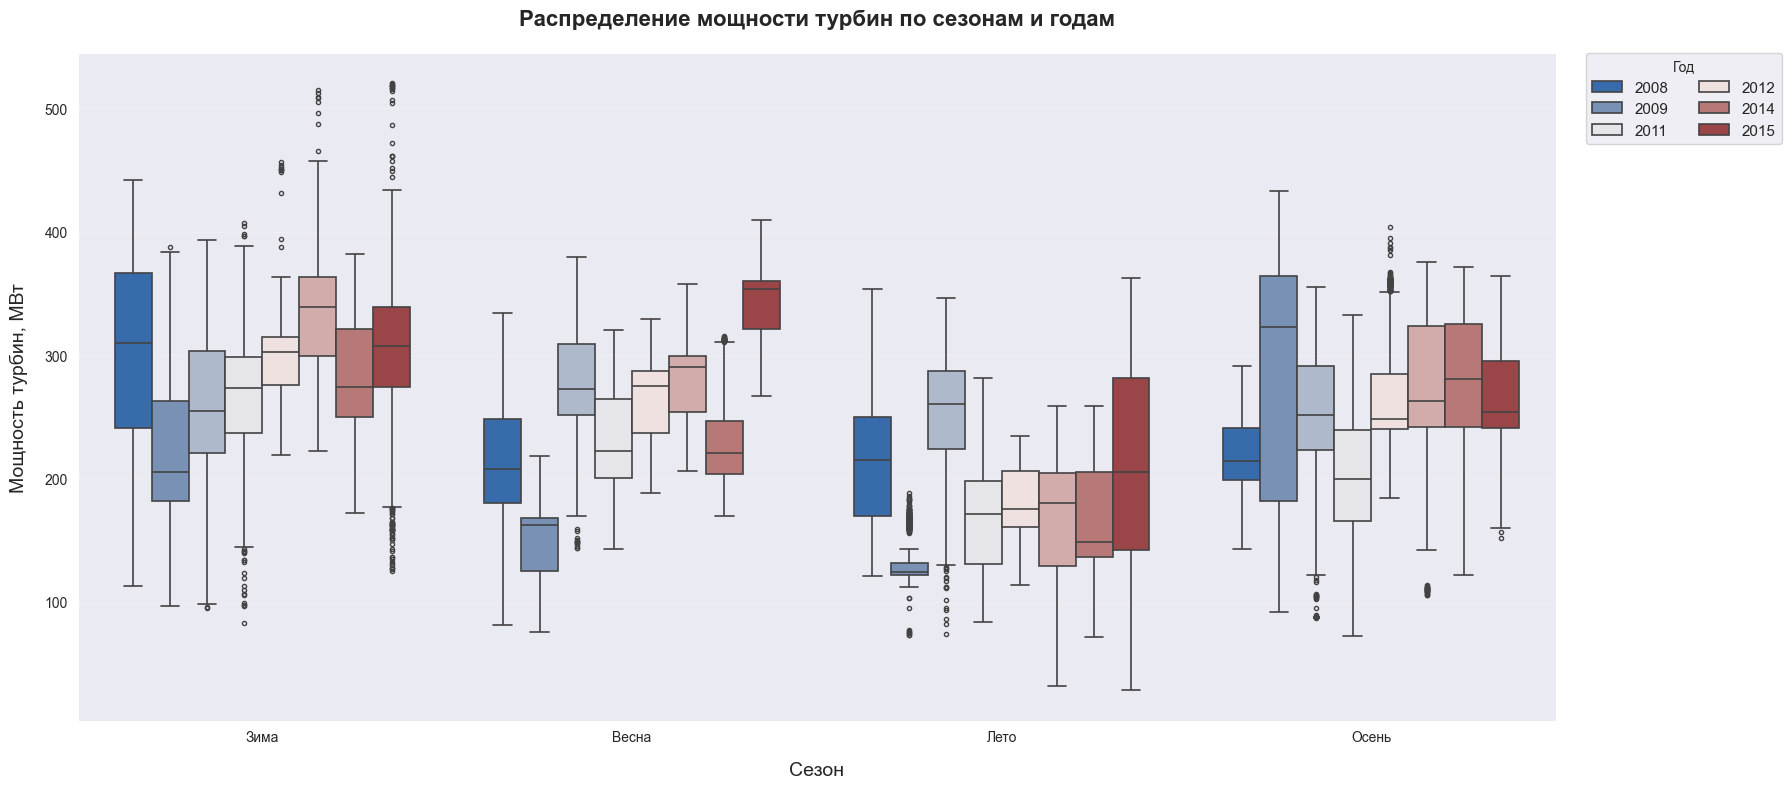

In [42]:
plt.figure(figsize=(18, 8))

season_order = ['Зима', 'Весна', 'Лето', 'Осень']

if daily['Season'].dtype == 'int64':
    season_mapping = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}
    daily['Season_Name'] = daily['Season'].map(season_mapping)
    season_data = 'Season_Name'
else:
    season_data = 'Season'

ax = sns.boxplot(data=daily, x=season_data, y="TurbinePowerSum", hue='Year',
                 palette="vlag",
                order=season_order,
                width=0.8,
                linewidth=1.2,
                fliersize=3,
                dodge=True)

# Настраиваем оформление
plt.title('Распределение мощности турбин по сезонам и годам',
          pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Сезон', fontsize=14, labelpad=12)
plt.ylabel('Мощность турбин, МВт', fontsize=14, labelpad=12)

ax.legend(title='Год',
          bbox_to_anchor=(1.02, 1),
          loc='upper left',
          borderaxespad=0.,
          fontsize=11,
          ncol=2)

ax.grid(True, axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

### Анализ данных для обучения

<Figure size 1800x3000 with 0 Axes>

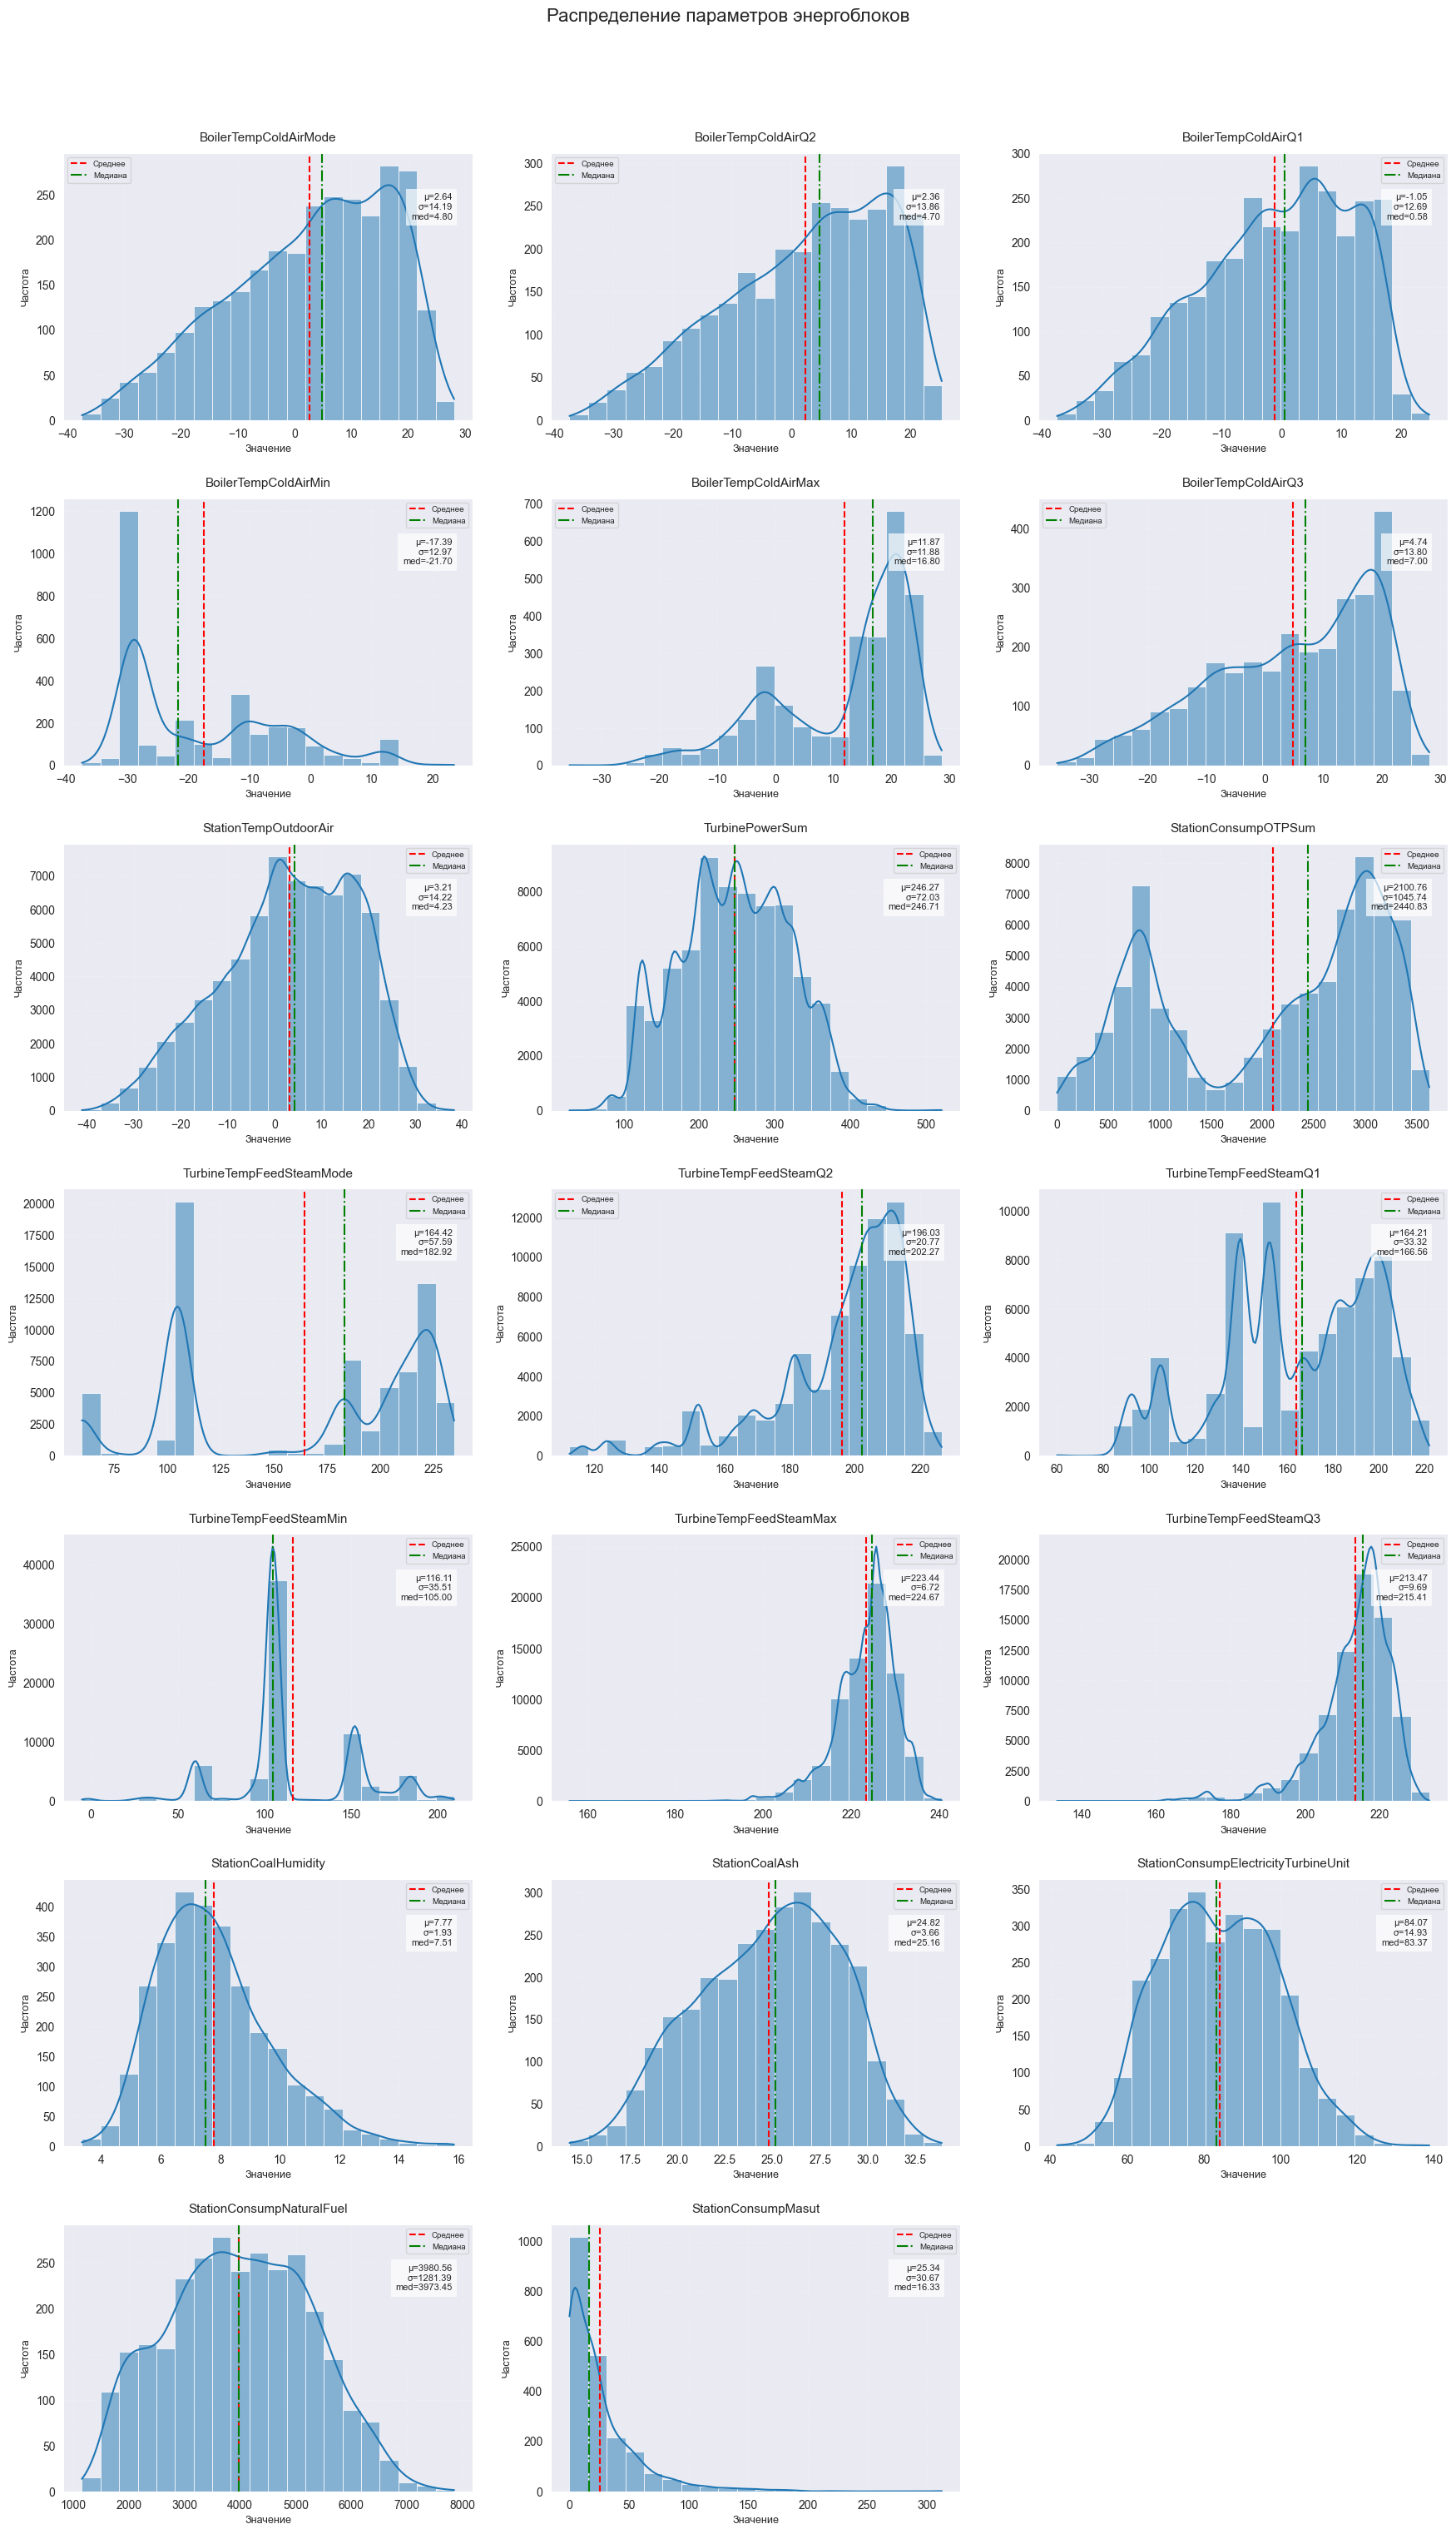

In [43]:
plt.figure(figsize=(18, 30))
axes = plt.subplots(7, 3, figsize=(18, 30))[1].flatten()

columns = [
    'BoilerTempColdAirMode', 'BoilerTempColdAirQ2', 'BoilerTempColdAirQ1',
    'BoilerTempColdAirMin', 'BoilerTempColdAirMax', 'BoilerTempColdAirQ3',
    'StationTempOutdoorAir', 'TurbinePowerSum', 'StationConsumpOTPSum',
    'TurbineTempFeedSteamMode', 'TurbineTempFeedSteamQ2', 'TurbineTempFeedSteamQ1',
    'TurbineTempFeedSteamMin', 'TurbineTempFeedSteamMax', 'TurbineTempFeedSteamQ3',
    'StationCoalHumidity', 'StationCoalAsh', 'StationConsumpElectricityTurbineUnit',
    'StationConsumpNaturalFuel', 'StationConsumpMasut'
]

for i, col in enumerate(columns):
    ax = axes[i]
    clean_data = df[col].dropna()

    sns.histplot(clean_data, bins=20, kde=True, linewidth=0.5, ax=ax)

    mean_val = clean_data.mean()
    median_val = clean_data.median()
    std_val = clean_data.std()

    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Среднее')
    ax.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label='Медиана')

    stats_text = f'μ={mean_val:.2f}\nσ={std_val:.2f}\nmed={median_val:.2f}'
    ax.text(0.95, 0.85, stats_text, transform=ax.transAxes,
           ha='right', va='top', fontsize=8,
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    ax.set_title(col, fontsize=11, pad=10)
    ax.set_xlabel('Значение', fontsize=9)
    ax.set_ylabel('Частота', fontsize=9)
    ax.grid(True, linestyle=':', alpha=0.3)
    ax.legend(fontsize=7, framealpha=0.7)

for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.suptitle('Распределение параметров энергоблоков', y=1.02, fontsize=16)
plt.tight_layout(pad=2.5, h_pad=2.0, w_pad=2.0)
plt.show()

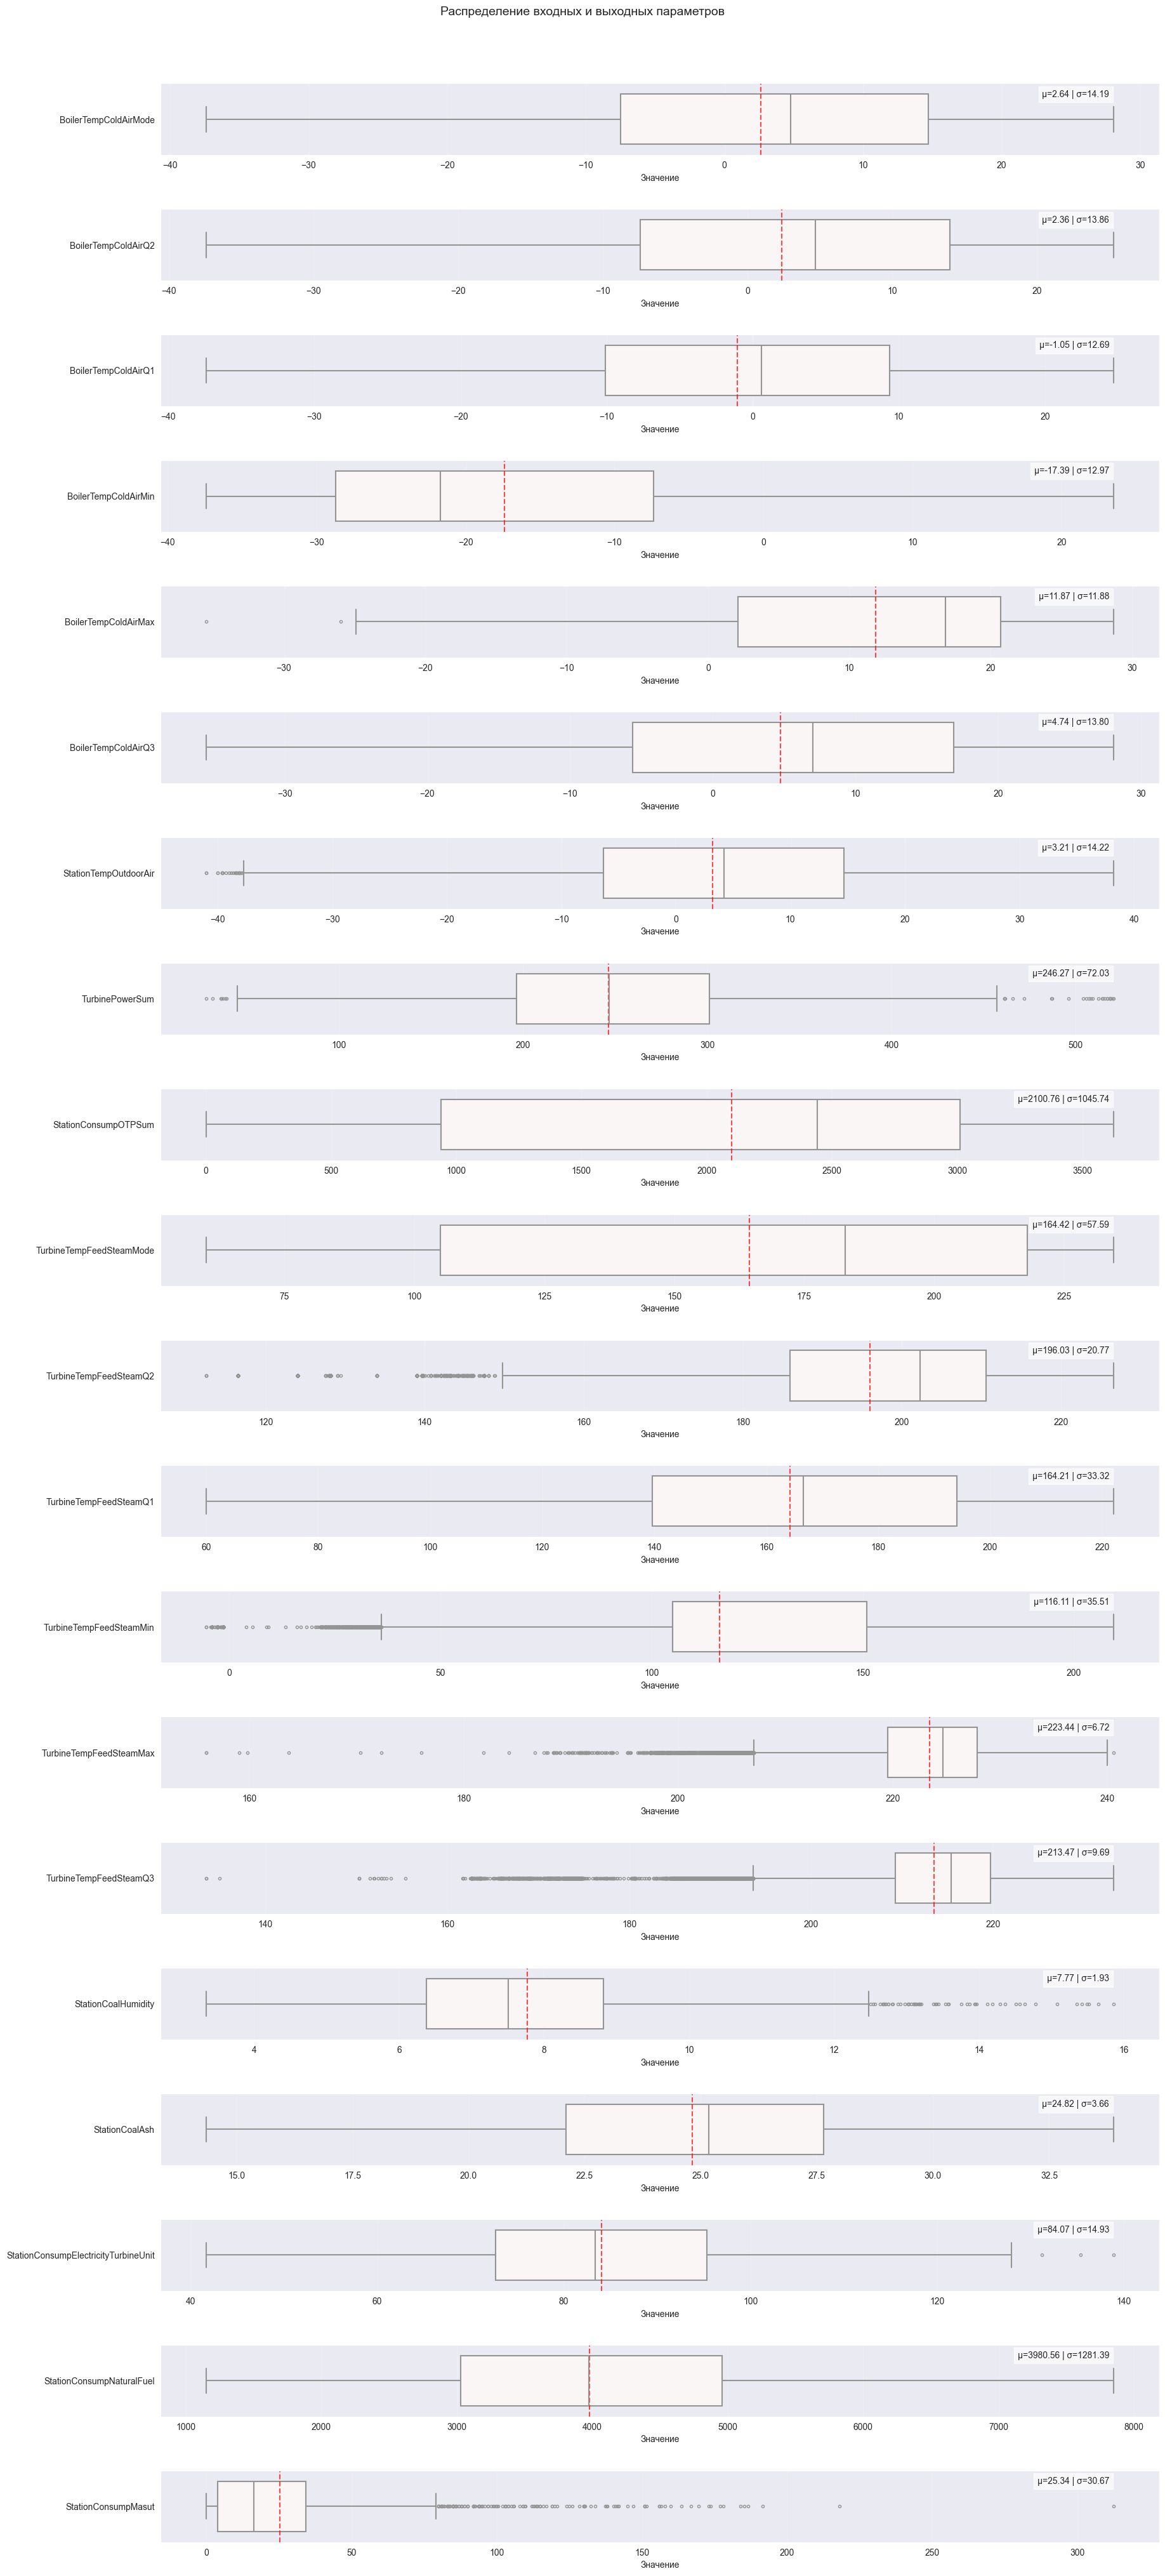

In [44]:
fig, axes = plt.subplots(len(columns), 1, figsize=(19, 2*len(columns)))

if len(columns) == 1:
    axes = [axes]

for ax, feature_name in zip(axes, columns):
    sns.boxplot(data=df[[feature_name]],
                orient='h',
                ax=ax,
                width=0.7,
                palette="vlag",
                linewidth=1.5,
                fliersize=3)

    mean_val = df[feature_name].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

    stats_text = f"μ={mean_val:.2f} | σ={df[feature_name].std():.2f}"
    ax.text(0.95, 0.85, stats_text,
            transform=ax.transAxes,
            ha='right', va='center',
            bbox=dict(facecolor='white', alpha=0.7))

    ax.grid(True, axis='x', alpha=0.2)
    ax.set_ylabel('')
    ax.set_xlabel('Значение', fontsize=10)

plt.tight_layout(pad=3.0)
plt.suptitle('Распределение входных и выходных параметров', y=1.02, fontsize=14)
plt.show()

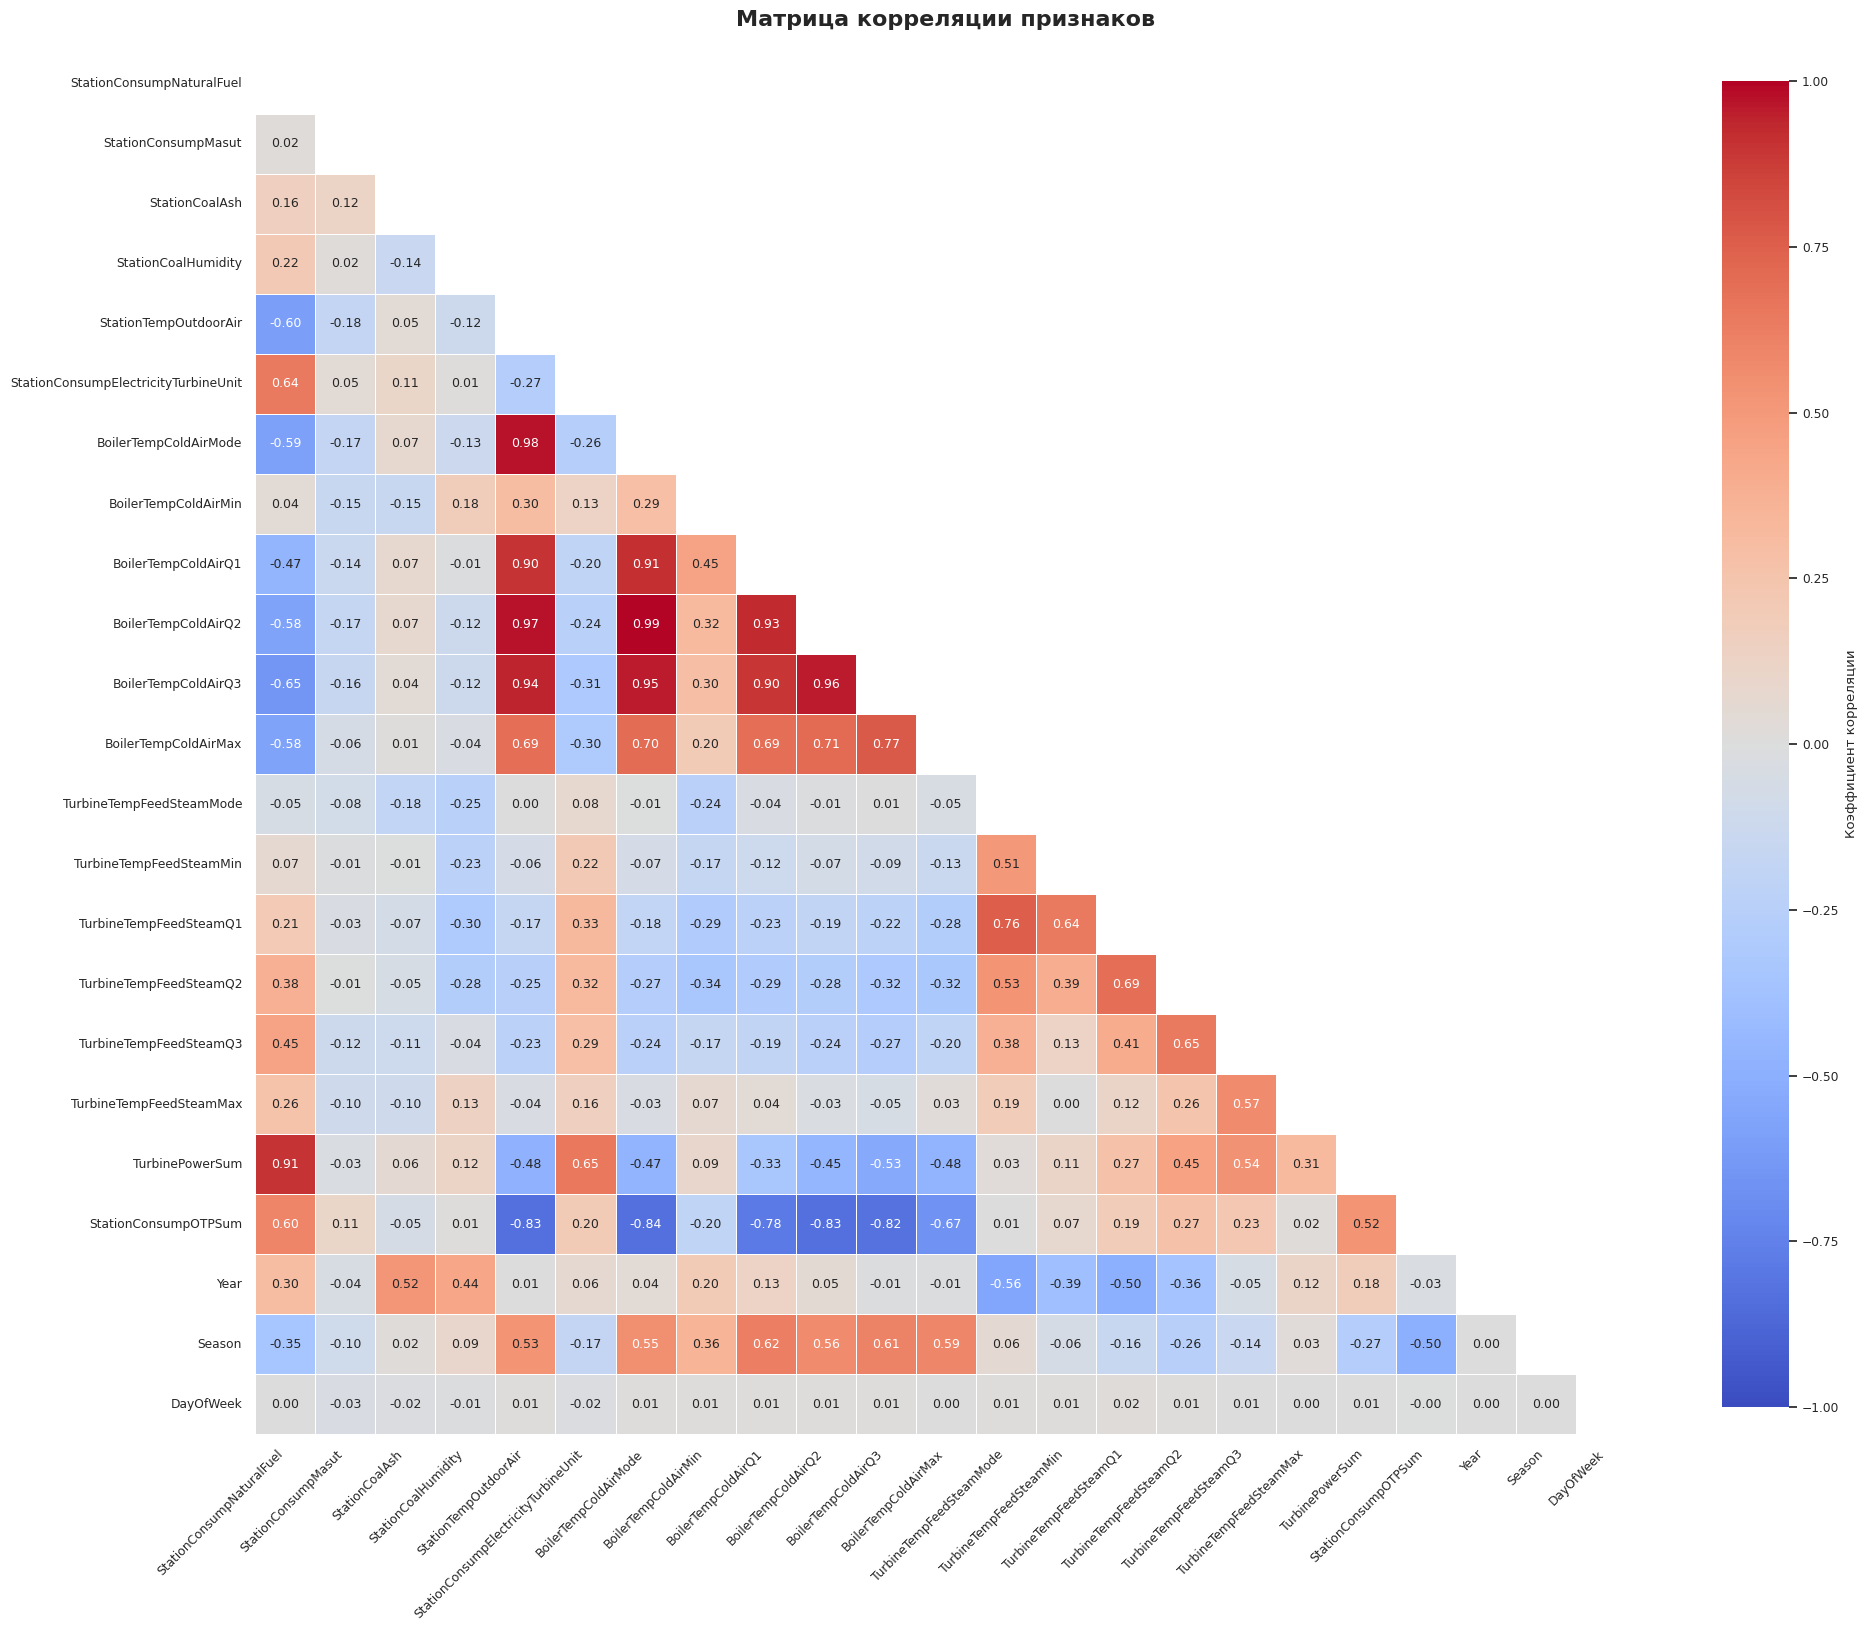

In [45]:
corr_df = df.corr(method="pearson")

sns.set(style="white", font_scale=0.8)
plt.rcParams['font.family'] = 'DejaVu Sans'

mask = np.triu(np.ones_like(corr_df, dtype=bool))

plt.figure(figsize=(20, 18))

heatmap = sns.heatmap(
    corr_df,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 9},
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={
        "shrink": 0.8,
        "label": "Коэффициент корреляции"
    }
)

plt.title('Матрица корреляции признаков', pad=20, fontsize=16, fontweight='bold')
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

heatmap.grid(visible=False)

plt.tight_layout()
plt.show()

### Сохранение датасета для обучения

In [49]:
from pathlib import Path
import os

BASE_DIR = Path(os.getcwd()).parent # Текущая рабочая директория

col_df = [
    'TurbinePowerSum',
    'StationTempOutdoorAir',
    'TurbineTempFeedSteamQ2',
    'StationCoalHumidity',
    'StationCoalAsh',
    'StationConsumpNaturalFuel',
    'Year',
    'Season',
    'DayOfWeek'
]

df[col_df].to_csv(BASE_DIR / 'data.csv')